# <center>Trabajo Práctico 1 : Reservas de Hotel</center>

### <center>Grupo 30. Integrantes: Tomás Iglesias, Valentín González, Leonardo Cruz <center>



# Análisis exploratorio de los datos

In [1]:
# Imports para el notebook
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st

from sklearn.ensemble import IsolationForest

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
hotels_train_url = "https://raw.githubusercontent.com/IglesiasT/7506R-1C2023-GRUPO30/main/data/hotels_train.csv"
df = pd.read_csv(hotels_train_url)
df_copia = df.copy()  # Trabajamos con una copia del df para evitar cambios no deseados en los datos originales

In [3]:
df_copia.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [4]:
df_copia.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'id',
 'is_canceled']

In [5]:
cantidad_registros, cantidad_columnas = df_copia.shape
print(f"El dataset contiene {cantidad_registros} registros y {cantidad_columnas} columnas")

El dataset contiene 61913 registros y 32 columnas


Ejemplo de un campo del dataset:

In [6]:
df_copia.loc[0]

hotel                                                       City Hotel
lead_time                                                           49
arrival_date_year                                                 2016
arrival_date_month                                           September
arrival_date_week_number                                            37
arrival_date_day_of_month                                            5
stays_in_weekend_nights                                              1
stays_in_week_nights                                                 2
adults                                                               1
children                                                           0.0
babies                                                               0
meal                                                                BB
country                                                            USA
market_segment                                               Online TA
distri

In [7]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

**Variables cuantitativas:**


*   lead_time
*   arrival_date_year
*   arrival_date_week_number (?)
*   arrival_date_day_of_month (?):
*   stays_in_weekend_nights
*   stays_in_week_nights
*   adults
*   children
*   babies
*   booking_changes
*   previous_cancellations
*   previous_bookings_not_canceled
*   days_in_waiting_list 
*   adr
*   required_car_parking_spaces
*   total_of_special_requests













**Variables cualitativas:**


*   hotel
*   arrival_date_month
*   meal
*   country
*   market_segment
*   distribution_channel
*   is_repeated_guest
*   reserved_room_type
*   assigned_room_type
*   deposit_type
*   agent
*   company
*   customer_type

**Otras:**


*   reservation_status_date
*   id



##Análisis inicial de las variables

Primero realizamos cambios a algunos nombres de las variables para trabajar de manera más cómoda:

In [8]:
df_copia = df_copia.rename(columns = {'arrival_date_month' : 'arrival_month'})
df_copia = df_copia.rename(columns = {'arrival_date_year' : 'arrival_year'})
df_copia = df_copia.rename(columns = {'arrival_date_week_number' : 'arrival_week'})
df_copia = df_copia.rename(columns = {'arrival_date_day_of_month' : 'arrival_day_month'})

df_copia = df_copia.rename(columns = {'stays_in_week_nights' : 'week_nights'})
df_copia = df_copia.rename(columns = {'stays_in_weekend_nights' : 'weekend_nights'})

df_copia = df_copia.rename(columns = {'required_car_parking_spaces' : 'parking_spaces'})

df_copia = df_copia.rename(columns = {'total_of_special_requests' : 'special_requests'})

Realizamos algunos cambios en el formato de las variables:

In [9]:
df_copia['arrival_year'] = df_copia['arrival_year'].astype(int)

### Análisis de las variables cuantitativas

In [10]:
# describe() obtiene el análisis de todas las variables numéricas, incluyendo las cualitativas. Pido el análisis para todas menos las cualitativas.
variables_cuantitativas = df_copia[['lead_time','arrival_year','arrival_week','arrival_day_month','weekend_nights','week_nights','adults','children','babies','booking_changes', 'previous_cancellations','previous_bookings_not_canceled','days_in_waiting_list','adr','parking_spaces','special_requests']]
variables_cuantitativas.describe()   # TODO: filtrar el resultado de describe

,lead_time,arrival_year,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,babies,booking_changes,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,parking_spaces,special_requests
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.195952,0.114790,0.115420,2.638977,102.383773,0.049957,0.523703
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.610519,0.993723,1.396359,18.619092,47.757640,0.221023,0.775412
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,17.000000,26.000000,70.000000,391.000000,510.000000,8.000000,5.000000


###Análisis de las variables cualitativas


In [11]:
variables_cualitativas = df_copia[['hotel','arrival_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type',]]
variables_cualitativas.describe(include = 'all')

,hotel,arrival_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type
count,61913,61913,61913,61692,61913,61913,61913.000000,61913,61913,61913,54023.000000,3152.000000,61913
unique,2,12,5,149,8,5,NaN,10,12,3,NaN,NaN,4
top,City Hotel,August,BB,PRT,Online TA,TA/TO,NaN,A,A,No Deposit,NaN,NaN,Transient
freq,42129,7176,47837,27950,29269,51849,NaN,45134,40007,51685,NaN,NaN,47449
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.027991,NaN,NaN,NaN,84.541010,188.539340,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.164948,NaN,NaN,NaN,109.523772,129.457025,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,9.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,9.000000,67.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,12.000000,179.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,208.000000,270.000000,NaN


Aca analizamos los diferentes valores que pueden tomar algunas de las variables cualitativas:

In [12]:
columna = df_copia['meal']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64


Hay 5 diferentes valores únicos en la variable meal


In [13]:
columna = df_copia['arrival_month']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_month, dtype: int64


Hay 12 diferentes valores únicos en la variable arrival_month


In [14]:
columna = df_copia['distribution_channel']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64


Hay 5 diferentes valores únicos en la variable distribution_channel


In [15]:
columna = df_copia['market_segment']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64


Hay 8 diferentes valores únicos en la variable market_segment


In [16]:
columna = df_copia['reserved_room_type']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")
print('\n')
columna = df_copia['assigned_room_type']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64


Hay 10 diferentes valores únicos en la variable reserved_room_type


A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64


Hay 12 diferentes valores únicos en la variable assigned_room_type


In [17]:
columna = df_copia['country']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")
print(f"Cantidad de companias con un solo registro: {(columna.value_counts() == 1).sum()}")

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64


Hay 149 diferentes valores únicos en la variable country
Cantidad de companias con un solo registro: 21


In [18]:
columna = df_copia['agent']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")
print(f"Cantidad de companias con un solo registro: {(columna.value_counts() == 1).sum()}")

9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
         ...  
420.0        1
352.0        1
450.0        1
283.0        1
25.0         1
Name: agent, Length: 296, dtype: int64


Hay 296 diferentes valores únicos en la variable agent
Cantidad de companias con un solo registro: 54


In [19]:
columna = df_copia['company']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")
print(f"Cantidad de companias con un solo registro: {(columna.value_counts() == 1).sum()}")

40.0     390
223.0    364
67.0     169
45.0     118
153.0    106
        ... 
305.0      1
275.0      1
461.0      1
220.0      1
160.0      1
Name: company, Length: 276, dtype: int64


Hay 276 diferentes valores únicos en la variable company
Cantidad de companias con un solo registro: 78


In [20]:
columna = df_copia['deposit_type']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64


Hay 3 diferentes valores únicos en la variable deposit_type


In [21]:
columna = df_copia['customer_type']
print(columna.value_counts())
print("\n")
print(f"Hay {len(columna.value_counts())} diferentes valores únicos en la variable {columna.name}")

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64


Hay 4 diferentes valores únicos en la variable customer_type


## Distribución de las variables

####A continuación analizaremos los gráficos de distribución de algunas variables cuantitativas que valen la pena analizar:



---



[Text(0.5, 1.0, 'Distribucion de la variable arrival_year'),
 Text(0.5, 0, 'Arrival year')]

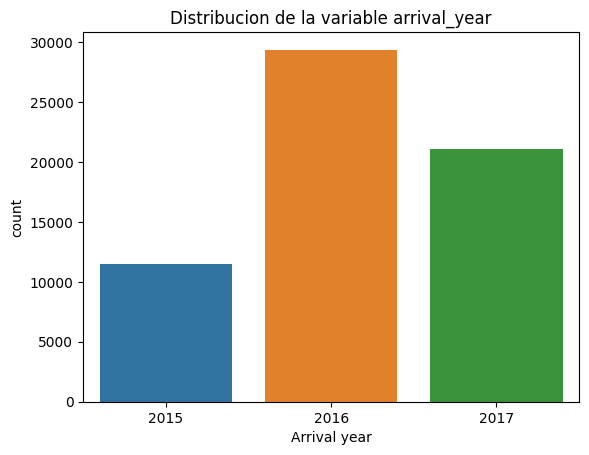

In [22]:
sns.countplot(data = df_copia, x = "arrival_year").set(title = "Distribucion de la variable arrival_year", xlabel = "Arrival year")



---



[Text(0.5, 1.0, 'Boxplot variable arrival_day_month'),
 Text(0, 0.5, 'Arrival day month')]

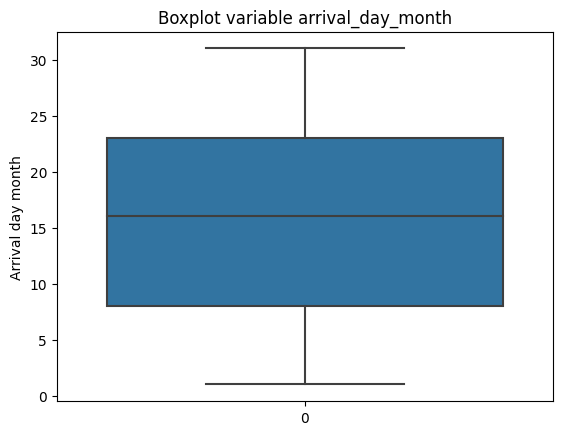

In [23]:
sns.boxplot(df_copia['arrival_day_month']).set(title = 'Boxplot variable arrival_day_month',ylabel = 'Arrival day month')



---



[Text(0.5, 1.0, 'Boxplot variable arrival_week '),
 Text(0, 0.5, 'Arrival week ')]

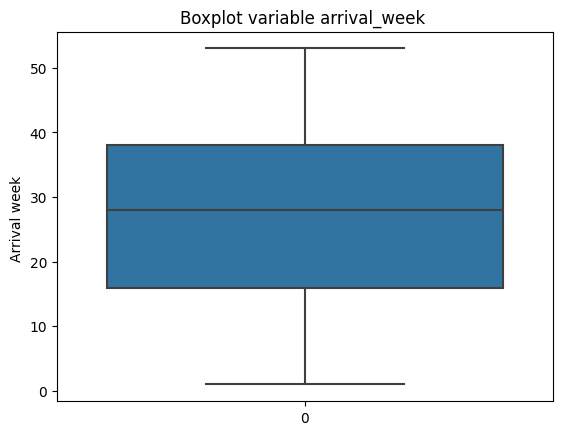

In [24]:
sns.boxplot(df_copia['arrival_week']).set(title = 'Boxplot variable arrival_week ',ylabel = 'Arrival week ')



---



[Text(0.5, 1.0, 'Boxplot variable adr'), Text(0, 0.5, 'ADR')]

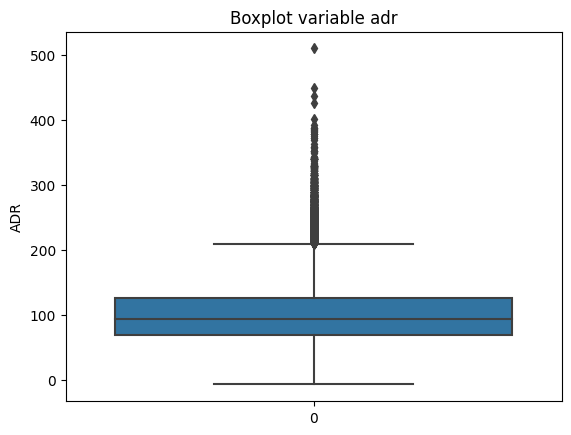

In [25]:
sns.boxplot(df_copia['adr']).set(title = 'Boxplot variable adr',ylabel = 'ADR')

Esta variable presenta muchos outliers, que serán analizados más abajo.

---



[Text(0.5, 1.0, 'Boxplot variable lead_time'), Text(0, 0.5, 'Lead time')]

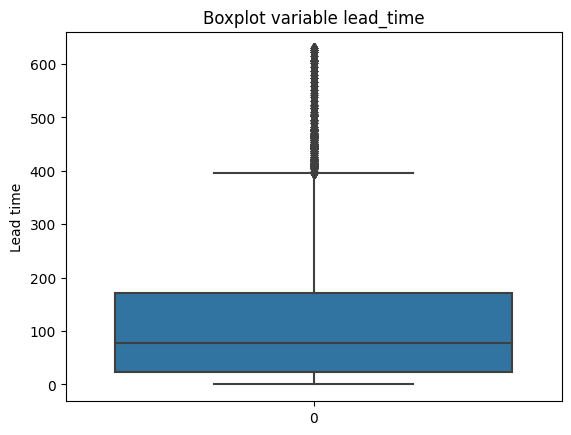

In [26]:
sns.boxplot(df_copia['lead_time']).set(title = 'Boxplot variable lead_time', ylabel = 'Lead time')

Esta variable también presenta muchos outliers.

---



[Text(0.5, 1.0, 'Boxplot variable week_nights'), Text(0, 0.5, 'Week nights')]

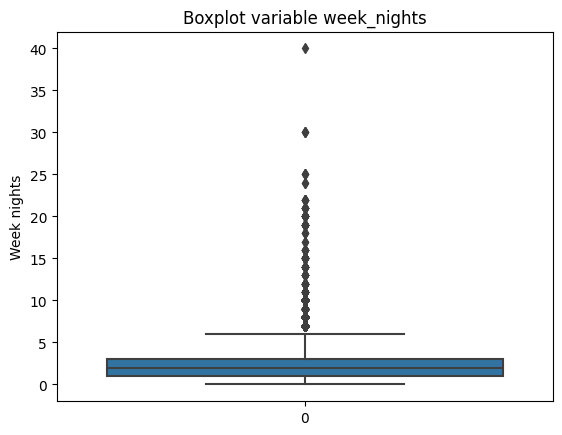

In [27]:
sns.boxplot(df_copia['week_nights']).set(title = 'Boxplot variable week_nights', ylabel = 'Week nights')



---



[Text(0.5, 1.0, 'Boxplot variable weekend_nights'),
 Text(0, 0.5, 'Weekend nights')]

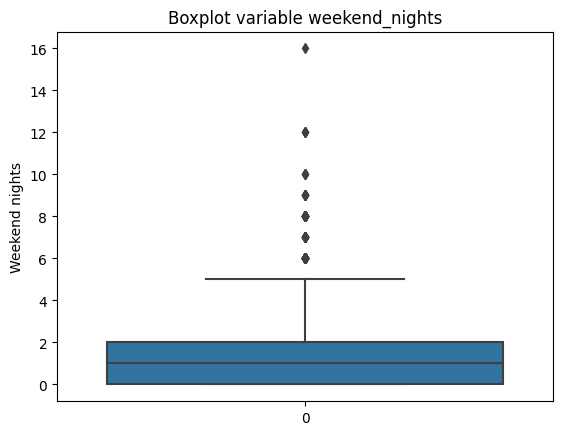

In [28]:
sns.boxplot(df_copia['weekend_nights']).set(title = 'Boxplot variable weekend_nights', ylabel = 'Weekend nights')



---



[Text(0.5, 1.0, 'Distribucion de la variable adults'), Text(0.5, 0, 'Adults')]

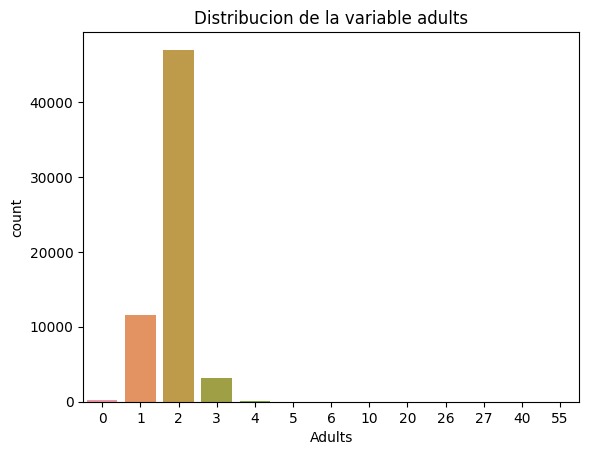

In [29]:
sns.countplot(data = df_copia, x = "adults").set(title = "Distribucion de la variable adults", xlabel = "Adults")



---



[Text(0.5, 1.0, 'Distribucion de la variable children'),
 Text(0.5, 0, 'Children')]

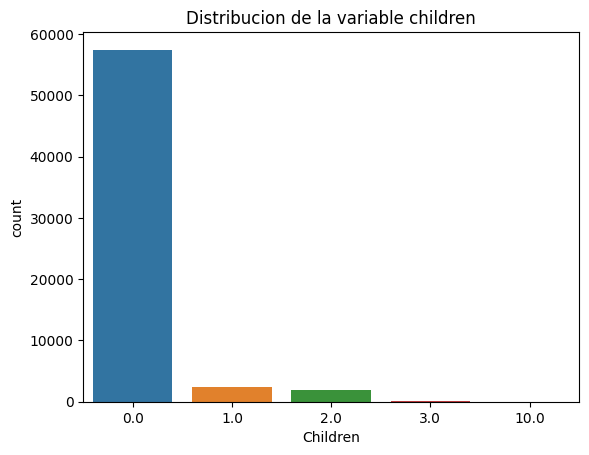

In [30]:
sns.countplot(data = df_copia, x = "children").set(title = "Distribucion de la variable children", xlabel = "Children")



---



[Text(0.5, 1.0, 'Distribucion de la variable babies'), Text(0.5, 0, 'Babies')]

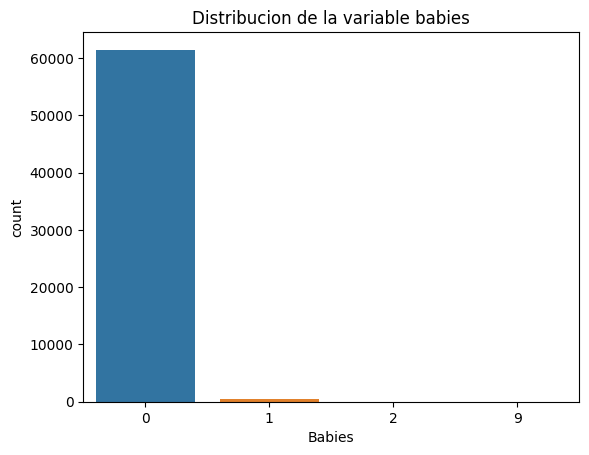

In [31]:
sns.countplot(data = df_copia, x = "babies").set(title = "Distribucion de la variable babies", xlabel = "Babies")



---



[Text(0.5, 1.0, 'Distribucion de la variable previous_cancellations'),
 Text(0.5, 0, 'Previous cancellations')]

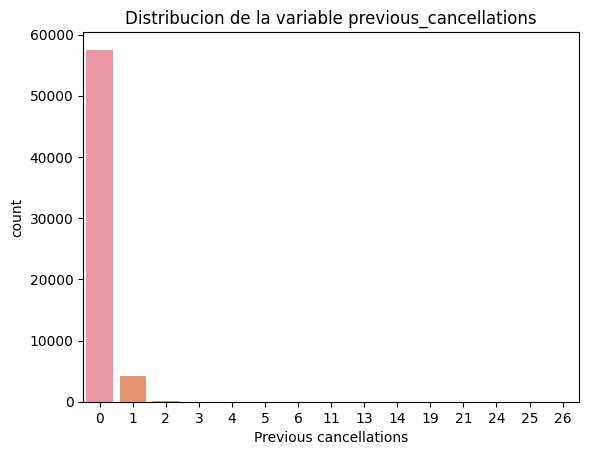

In [32]:
sns.countplot(data = df_copia, x = "previous_cancellations").set(title = "Distribucion de la variable previous_cancellations", xlabel = "Previous cancellations")


Un altísimo porcentaje de los clientes no realizaron ninguna cancelación previa.

---




[Text(0.5, 1.0, 'Boxplot variable previous_bookings_not_canceled'),
 Text(0, 0.5, 'Previous bookings not canceled')]

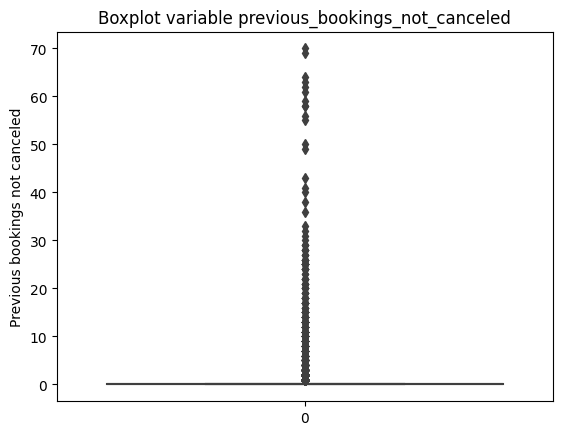

In [33]:
#plt.figure(figsize=(18,5))
#sns.countplot(data = df_copia, x = "previous_bookings_not_canceled").set(title = "Distribucion de la variable previous_bookings_not_canceled", xlabel = "Previous bookings not canceled")
sns.boxplot(df_copia['previous_bookings_not_canceled']).set(title = 'Boxplot variable previous_bookings_not_canceled', ylabel = 'Previous bookings not canceled')

En este gráfico podemos ver que la media se ajusta en el 0 y por ende hay muchos outliers.

---



[Text(0.5, 1.0, 'Distribucion de la variable booking_changes'),
 Text(0.5, 0, 'Booking changes')]

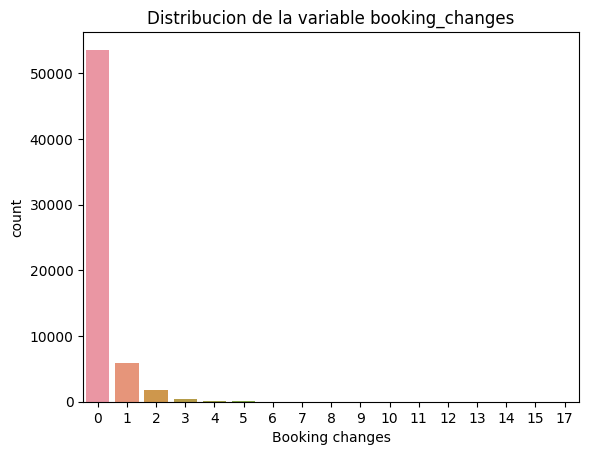

In [34]:
sns.countplot(data = df_copia, x = "booking_changes").set(title = "Distribucion de la variable booking_changes", xlabel = "Booking changes")



---



[Text(0.5, 1.0, 'Distribucion de la variable parking_spaces'),
 Text(0.5, 0, 'Parking Spaces')]

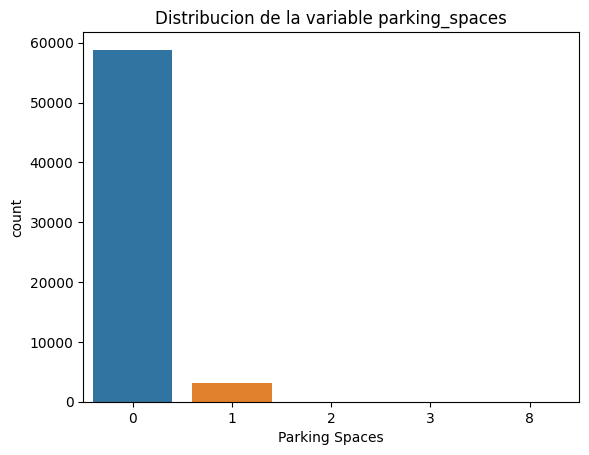

In [35]:
sns.countplot(data = df_copia, x = "parking_spaces").set(title = "Distribucion de la variable parking_spaces", xlabel = "Parking Spaces")



---



[Text(0.5, 1.0, 'Distribucion de la variable special_requests'),
 Text(0.5, 0, 'Special requests')]

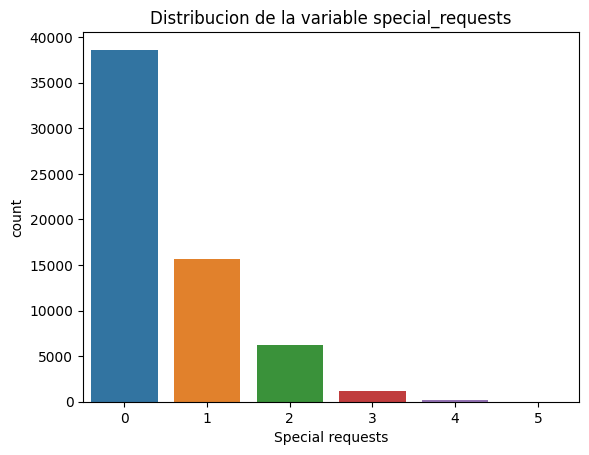

In [36]:
sns.countplot(data = df_copia, x = "special_requests").set(title = "Distribucion de la variable special_requests", xlabel = "Special requests")



---



---



####Ahora toca analizar los gráficos de distribución de las variables cualitativas:

[Text(0.5, 1.0, 'Distribucion de la variable hotel'), Text(0.5, 0, 'Hotel')]

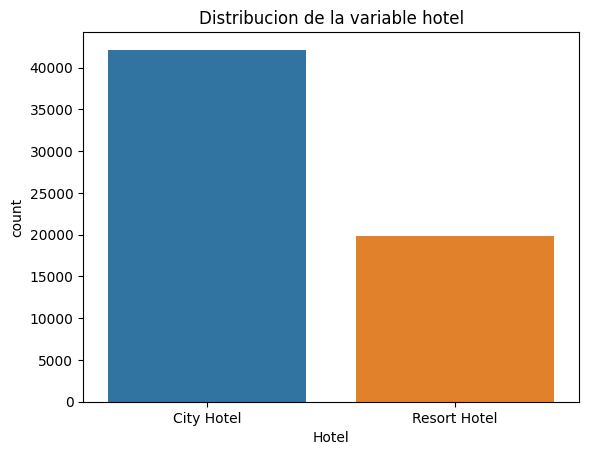

In [37]:
sns.countplot(data = df_copia, x = "hotel").set(title = "Distribucion de la variable hotel", xlabel = "Hotel")



---



[Text(0.5, 1.0, 'Distribucion de la variable meal'), Text(0.5, 0, 'Meal')]

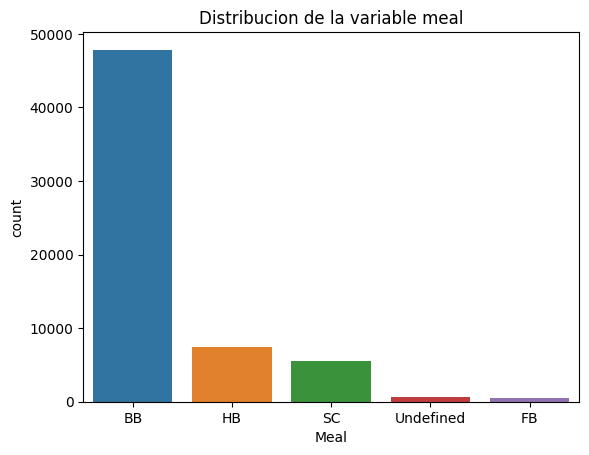

In [38]:
sns.countplot(data = df_copia, x = "meal").set(title = "Distribucion de la variable meal", xlabel = "Meal")

La mayoría de huespedes registrados eligieron la opción más simple.

---



[Text(0.5, 1.0, 'Distribucion de la variable is_repeated_guest'),
 Text(0.5, 0, 'Is repeated guest')]

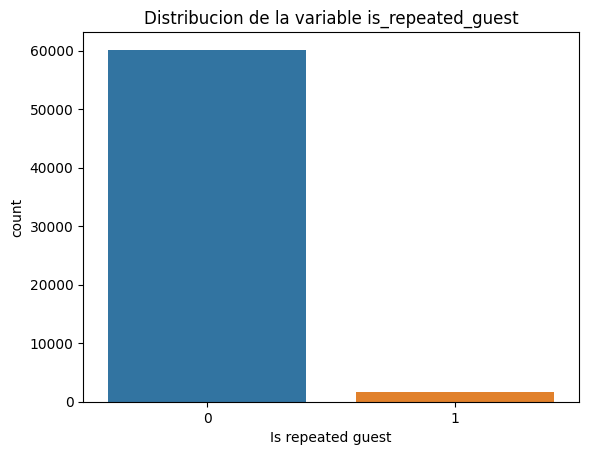

In [39]:
sns.countplot(data = df_copia, x = "is_repeated_guest").set(title = "Distribucion de la variable is_repeated_guest", xlabel = "Is repeated guest")

Una conclusión evidente que podemos sacar del gráfico es que la mayoría de los huespedes registrados nunca habían concurrido anteriormente a los hoteles.

---



[Text(0.5, 1.0, "Mapa de calor de las variables 'reserved_room_type' y 'assigned_room_type'")]

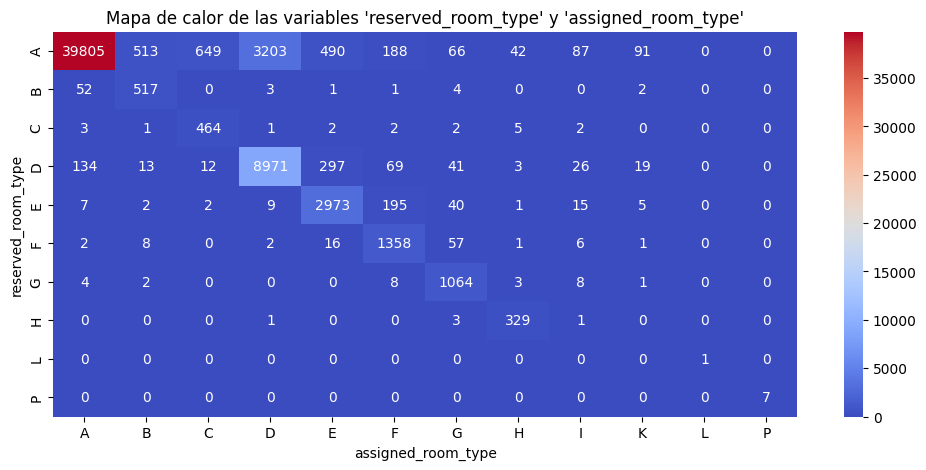

In [40]:
plt.figure(figsize = (12,5))
crosstab_room = pd.crosstab(df_copia['reserved_room_type'], df_copia['assigned_room_type'])
sns.heatmap(crosstab_room, annot=True, fmt='g', cmap = "coolwarm").set(title = "Mapa de calor de las variables 'reserved_room_type' y 'assigned_room_type'")

Acá podemos notar que la mayoría de registros predominan en celdas donde los valores de "assigned_room_type" y "reserved_room_type" coinciden. Es decir, a la mayoría de clientes se les asignó la habitación que reservaron.

---



[Text(0.5, 1.0, 'Distribucion de la variable market_segment'),
 Text(0.5, 0, 'Market segment')]

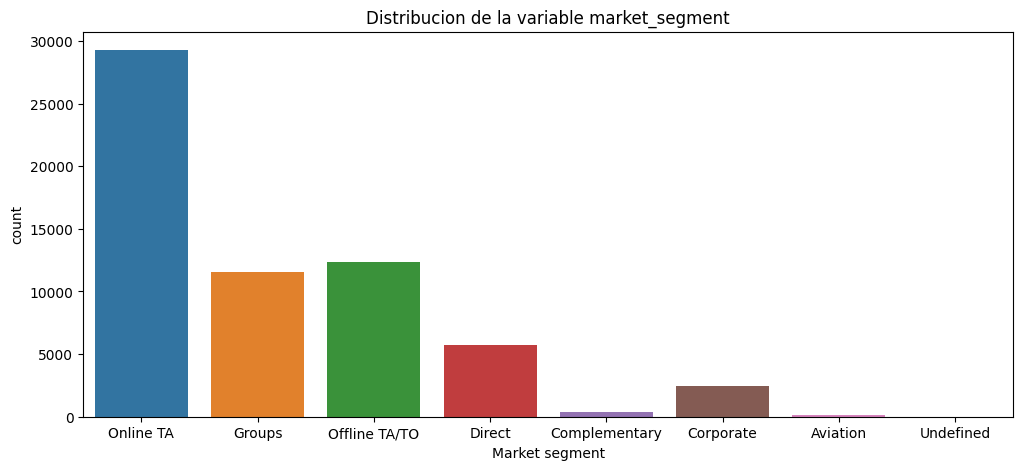

In [41]:
plt.figure(figsize = (12,5))
sns.countplot(data = df_copia, x = "market_segment").set(title = "Distribucion de la variable market_segment", xlabel = "Market segment")



---



[Text(0.5, 1.0, 'Distribucion de la variable distribution_channel'),
 Text(0.5, 0, 'Distribution channel')]

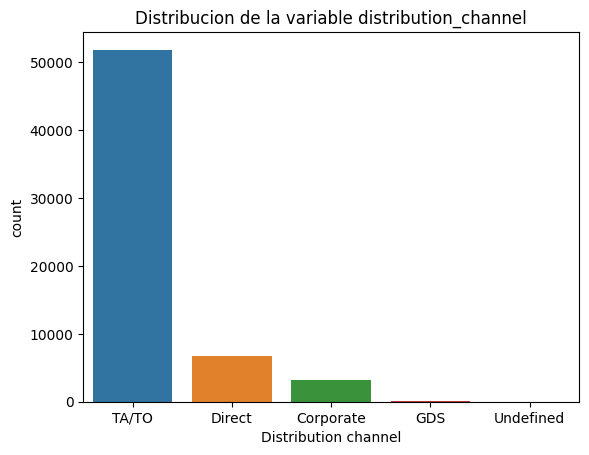

In [42]:
sns.countplot(data = df_copia, x = "distribution_channel").set(title = "Distribucion de la variable distribution_channel", xlabel = "Distribution channel")



---



[Text(0.5, 1.0, 'Distribucion de la variable customer_type'),
 Text(0.5, 0, 'Customer type')]

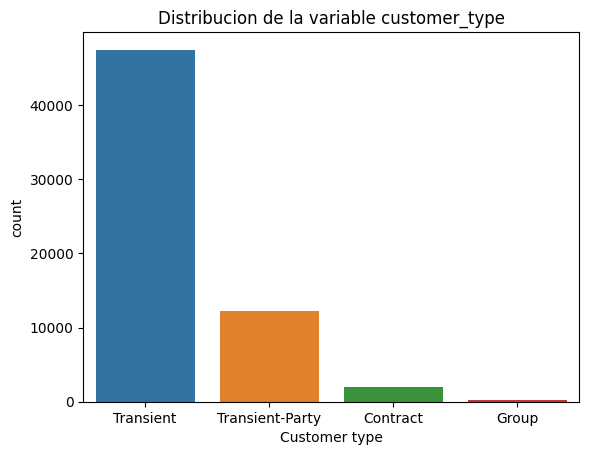

In [43]:
sns.countplot(data = df_copia, x = "customer_type").set(title = "Distribucion de la variable customer_type", xlabel = "Customer type")



---



[Text(0.5, 1.0, 'Distribucion de la variable deposit_type'),
 Text(0.5, 0, 'Deposit type')]

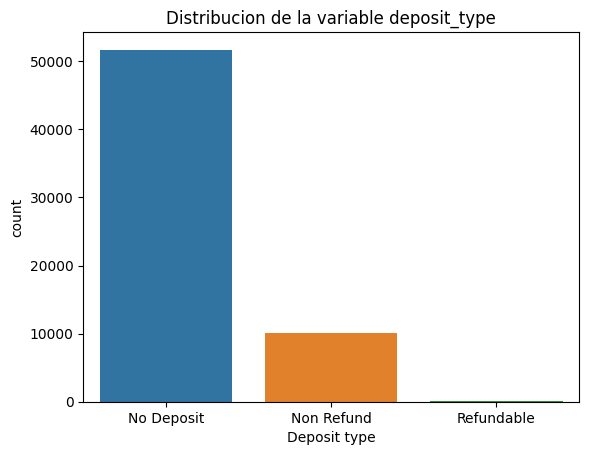

In [44]:
sns.countplot(data = df_copia, x = "deposit_type").set(title = "Distribucion de la variable deposit_type", xlabel = "Deposit type")

En un primer vistazo, podemos notar que la opción mas frecuente es no ingresar un depósito ya que, claramente, es la opción más barata.

---



[Text(0.5, 1.0, 'Distribucion de la variable arrival_month'),
 Text(0.5, 0, 'Mes')]

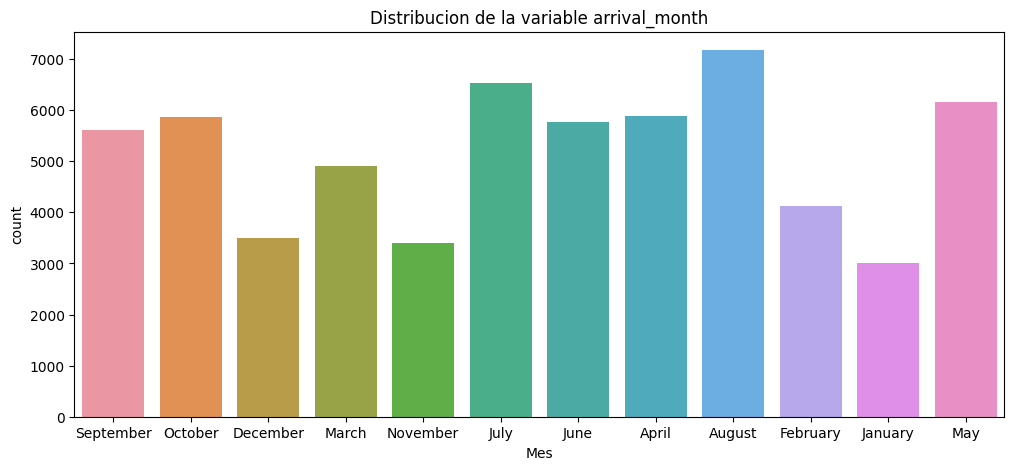

In [45]:
plt.figure(figsize = (12,5))
sns.countplot(data = df_copia, x = "arrival_month").set(title = "Distribucion de la variable arrival_month", xlabel = "Mes")

Acá podemos analizar que los dos meses más concurridos, julio y agosto, son en época de verano.

---



## Correlacion y Covarianza

Observamos la correlacion y covarianza de las variables mediante estas dos tablas:

In [46]:
variables_cuantitativas.cov()

,lead_time,arrival_year,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,babies,booking_changes,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,parking_spaces,special_requests
lead_time,12258.465118,1.818502,201.862627,-6.755375,6.538163,29.240236,7.235679,-2.054316,-0.233379,-1.334055,10.411942,-10.528775,343.075082,-499.994682,-2.784139,-10.539204
arrival_year,1.818502,0.501815,-5.179294,0.014490,0.019041,0.054483,0.011090,0.016954,-0.000897,0.011800,-0.100123,0.026815,-0.771887,7.355174,-0.001819,0.059268
arrival_week,201.862627,-5.179294,182.952957,6.868022,0.189758,0.311042,0.206254,0.034630,0.020212,0.099807,0.611967,-0.451341,4.867659,48.723868,0.004256,0.307129
arrival_day_month,-6.755375,0.014490,6.868022,77.360619,-0.135548,-0.438496,0.012687,0.049574,0.002082,0.051129,-0.301683,-0.024881,4.545072,14.153569,0.000573,0.052814
weekend_nights,6.538163,0.019041,0.189758,-0.135548,0.986249,0.914826,0.048787,0.020798,0.002013,0.026528,-0.010964,-0.052637,-1.063376,2.899560,-0.003123,0.055560
week_nights,29.240236,0.054483,0.311042,-0.438496,0.914826,3.552946,0.097702,0.044253,0.003716,0.080663,-0.025132,-0.118941,-0.145275,7.463522,-0.009022,0.107217
adults,7.235679,0.011090,0.206254,0.012687,0.048787,0.097702,0.346999,0.006933,0.000804,-0.016320,-0.001871,-0.079702,-0.103322,6.232389,0.001379,0.049148
children,-2.054316,0.016954,0.034630,0.049574,0.020798,0.044253,0.006933,0.162286,0.001075,0.014480,-0.010927,-0.011074,-0.266131,6.742575,0.004031,0.024995
babies,-0.233379,-0.000897,0.020212,0.002082,0.002013,0.003716,0.000804,0.001075,0.008493,0.004962,-0.000708,-0.000745,-0.018640,0.148478,0.000741,0.006671
booking_changes,-1.334055,0.011800,0.099807,0.051129,0.026528,0.080663,-0.016320,0.014480,0.004962,0.372734,-0.017939,0.010882,-0.167384,0.857223,0.010271,0.032618


<Axes: >

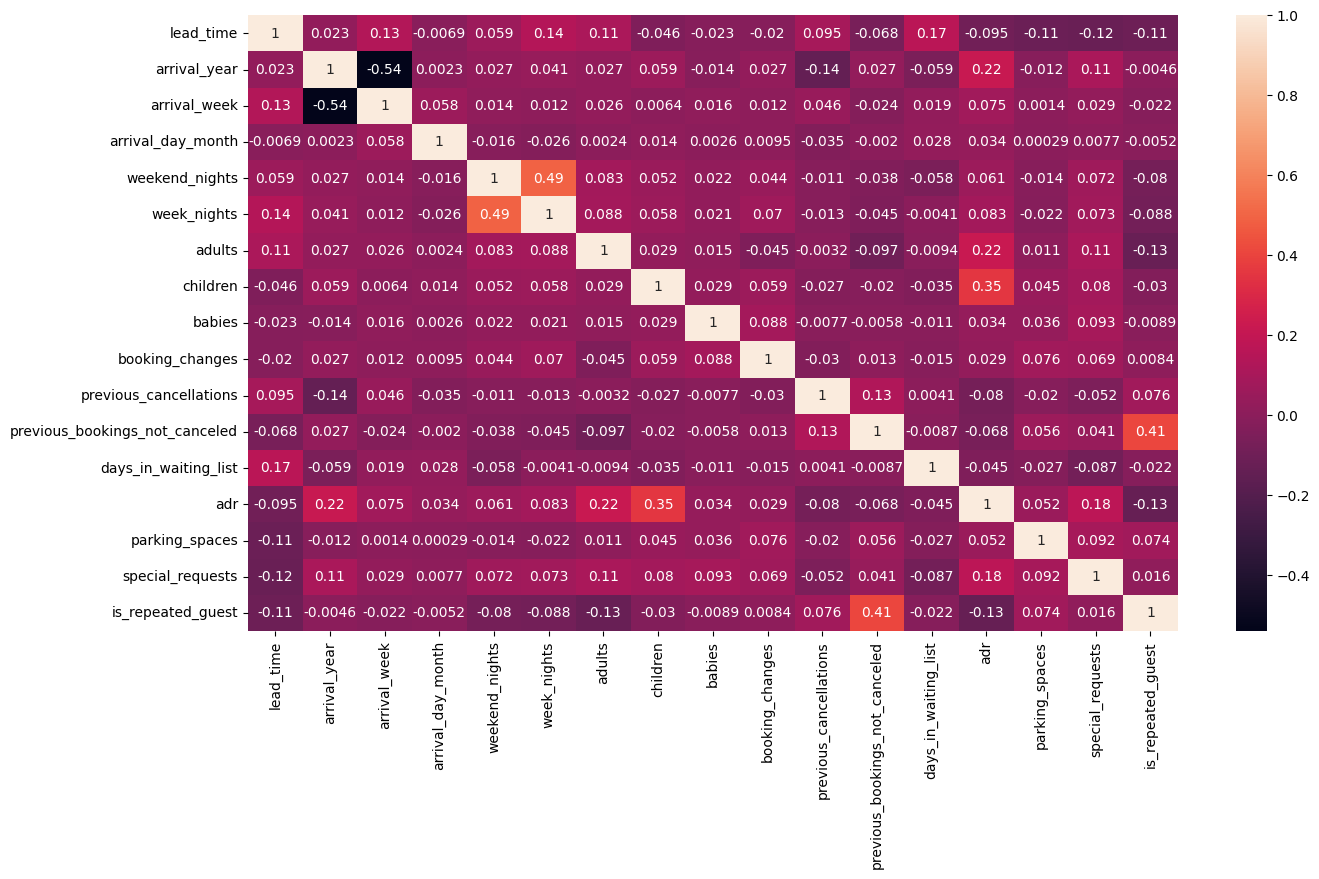

In [47]:
variables_correlacion = df_copia[['lead_time','arrival_year','arrival_week','arrival_day_month','weekend_nights','week_nights','adults','children','babies','booking_changes', 'previous_cancellations','previous_bookings_not_canceled','days_in_waiting_list','adr','parking_spaces','special_requests', 'is_repeated_guest']]
plt.figure(figsize = (15,8))
sns.heatmap(variables_correlacion.corr(), annot = True)

Vemos que el Heatmap indica que muy pocas variables tienen una relación lineal entre sí. Acá abajo analizamos las excepciones:

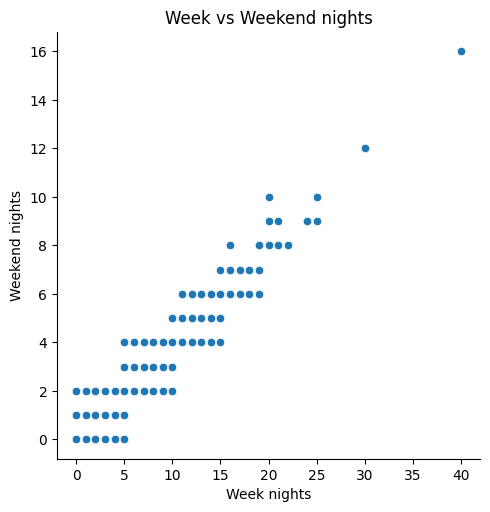

In [48]:
sns.relplot(data = df_copia, x = "week_nights", y = "weekend_nights").set(xlabel = "Week nights", ylabel = "Weekend nights", title = "Week vs Weekend nights")

Tiene sentido que estas dos variables se relacionen de forma lineal ya que entre más días de semana se reserven, es lógico que tambien se reserven más días de fin de semana.

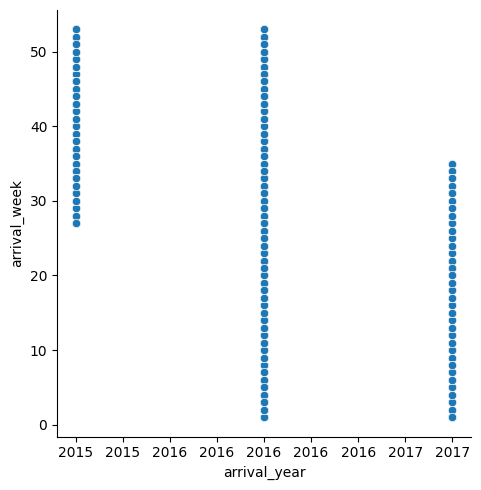

In [49]:
sns.relplot(data = df_copia, x = "arrival_year", y = "arrival_week")
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)
plt.show()

Este gráfico parece que podría tener un comportamiento lineal. Sin embargo se ve de esta manera porque todos los registros fueron sacados entre mediados de 2015 hasta mediados de 2017, por eso no existen puntos en el que la semana sea menor a 30 en 2015 o puntos en los que la semana sea mayor a 40 en 2017.

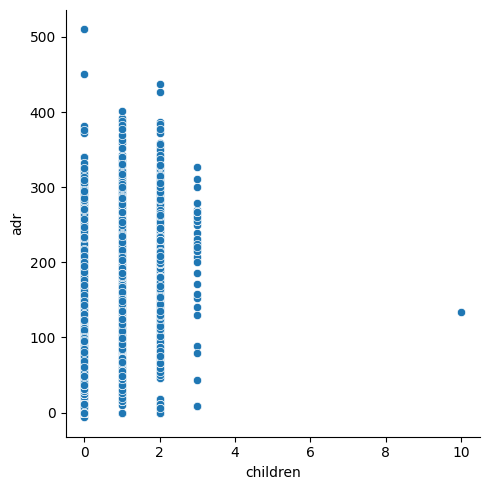

In [50]:
sns.relplot(data = df_copia, x = "children", y = "adr")

El valor de correlacion entre estas dos variables es bastante bajo, aún así, es el tercero más alto de todos. Parece que los puntos forman una nube con cierta forma lineal. Por el momento no podríamos determinar si están realmente relacionadas por causalidad o no.

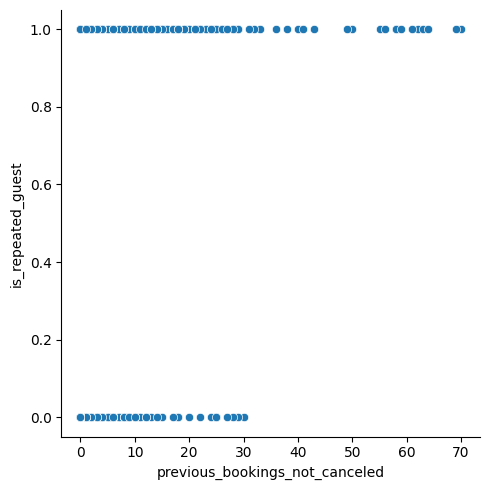

In [51]:
sns.relplot(data = df_copia, x = "previous_bookings_not_canceled", y = "is_repeated_guest")

Podemos notar que mientras más reservas no canceladas se hicieron, es más probable que el cliente sea un huesped repetido. Lo cual tiene cierto sentido, ya que si un cliente tiene registradas muchas reservas es probable que se haya alojado en el hotel anteriormente.

## Variables vs Target

**En este apartado queremos analizar las variables en relacion con el target**







---


Primero observamos la frecuencia de las reservas que fueron canceladas y las que no:

[Text(0.5, 0, 'Is Canceled'),
 Text(0.5, 1.0, 'Frecuencia de la variable is_canceled')]

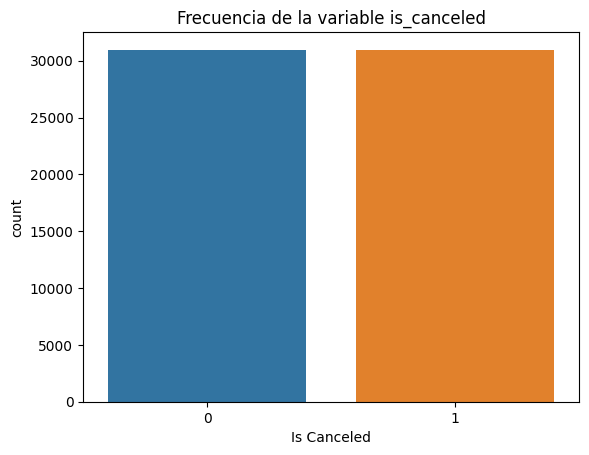

In [52]:
sns.countplot(data = df_copia, x = "is_canceled").set(xlabel = "Is Canceled", title = "Frecuencia de la variable is_canceled")

La distribución del target es muy pareja. Los valores de los clientes que cancelaron y los que no cancelaron son muy similares.



---



Ahora analizamos las variables "assigned_room_type" y "reserved_room_type" con el target:

In [53]:
pd.crosstab(df_copia['assigned_room_type'],df_copia['is_canceled'])

is_canceled,0,1
assigned_room_type,,
A,17002,23005
B,687,369
C,810,317
D,7741,4449
E,2379,1400
F,1184,637
G,715,562
H,203,181
I,140,5


In [54]:
pd.crosstab(df_copia['reserved_room_type'],df_copia['is_canceled'])

is_canceled,0,1
reserved_room_type,,
A,21647,23487
B,314,266
C,261,221
D,5321,4264
E,1888,1361
F,844,607
G,540,550
H,157,177
L,0,1


In [55]:
df_copia.groupby(['assigned_room_type','reserved_room_type', 'is_canceled']).count()['lead_time']

assigned_room_type  reserved_room_type  is_canceled
A                   A                   0              16812
                                        1              22993
                    B                   0                 50
                                        1                  2
                    C                   0                  3
                                                       ...  
K                   E                   0                  5
                    F                   0                  1
                    G                   0                  1
L                   L                   1                  1
P                   P                   1                  7
Name: lead_time, Length: 103, dtype: int64



---



Calculamos la frecuencia de la variable "arrival_date_month" teniendo en cuenta el target:

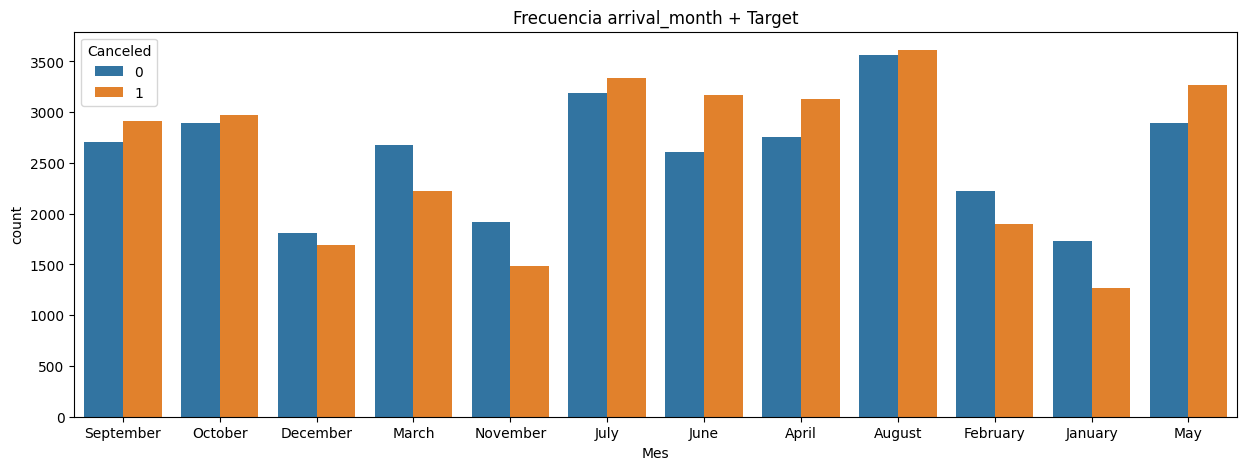

In [56]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_copia, x = "arrival_month", hue = "is_canceled").set(title = "Frecuencia arrival_month + Target", xlabel = "Mes")
plt.legend(title = "Canceled")
plt.show()

Se puede ver que en todos los meses la distribución del target es bastante equilibrada.

---



Calculamos la frecuencia de la variable "hotel" teniendo en cuenta el target:


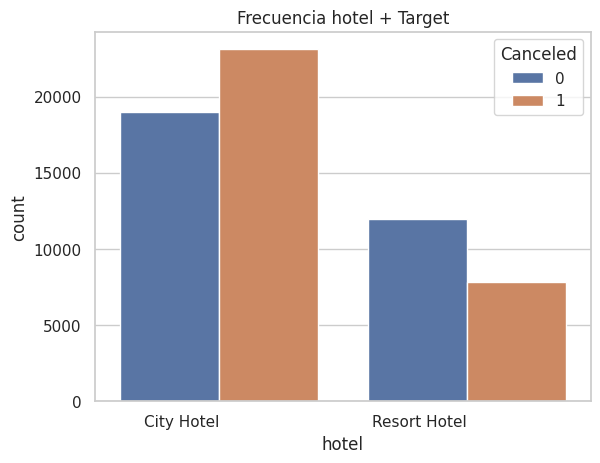

In [57]:
sns.set(style = "whitegrid")
sns.countplot(data = df_copia, x = "hotel", hue = "is_canceled").set(title = "Frecuencia hotel + Target")
plt.xticks(ha = 'right')
plt.legend(title = "Canceled", loc = "upper right")
plt.show()

Los clientes que reservaron para City Hotel tienden a cancelar mas que los que reservaron para Resort Hotel.

---



Hacemos una tabla de contingencia entre las variables "is_repeated_guest" y el target:

In [58]:
pd.crosstab(df_copia['is_repeated_guest'],df_copia['is_canceled'])

is_canceled,0,1
is_repeated_guest,,
0,29643,30537
1,1329,404


No hay mucho para comentar en esta tabla más allá de que la mayoria de registros no se hospedaron anteriormente.

---



Creamos una tabla de contingencia entre la variable "previous_cancellations" y el target:

In [59]:
pd.crosstab(df_copia['previous_cancellations'],df_copia['is_canceled'])

is_canceled,0,1
previous_cancellations,,
0,30751,26768
1,130,4007
2,33,28
3,24,10
4,9,7
5,8,1
6,8,4
11,9,6
13,0,8



> La gran parte de los registros se concentran en el primer valor, 0 cancelaciones previas, que está bastante balanceada entre los que cancelaron y los que no.

> Con 1 cancelación previa cambia totalmente la distribución, la gran mayoría de los registros cancelaron.


> De 2 a 11 cancelaciones se invierte nuevamente, se registran más clientes que no cancelaron.

> A partir de 13 cancelaciones podemos ver que todos los clientes cancelaron.

---






Creamos una tabla de contingencia entre la variable "deposit_type" y el target:

In [60]:
pd.crosstab(df_copia['deposit_type'],df_copia['is_canceled'])

is_canceled,0,1
deposit_type,,
No Deposit,30885,20800
Non Refund,37,10113
Refundable,50,28


> Los datos se concentran en 'No Deposit', donde hay más registros que no cancelaron su reserva.


> Algo para recalcar en esta tabla es la opcion 'Non Refund', ya que casi en su totalidad, los clientes que eligieron esta opción terminaron cancelando.

---





Hacemos un gráfico de dispersión entre la variable "lead_time" y el target:

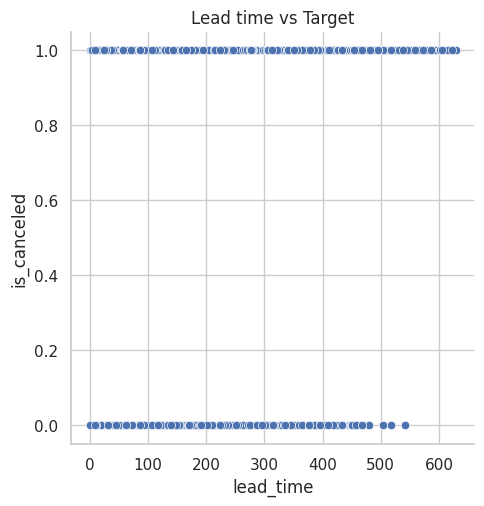

In [61]:
sns.relplot(data = df_copia, x = "lead_time", y = "is_canceled").set(title = "Lead time vs Target")

Hasta los 450 días no se llega a ver algo interesante para analizar. Aproximadamente a partir de ese día, la mayoria de los clientes tienden a cancelar.

---



Creamos un gráfico de dispersión entre la variable "days_in_waiting_list" y el target:

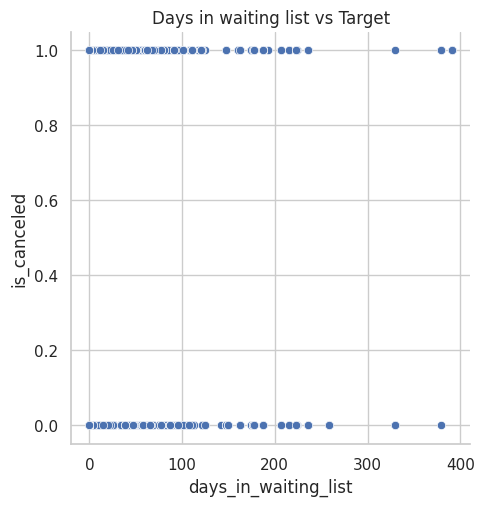

In [62]:
sns.relplot(data = df_copia, x = "days_in_waiting_list", y = "is_canceled").set(title = "Days in waiting list vs Target")



---



Hacemos un gráfico de dispersión entre la variable "booking_changes" y el target:

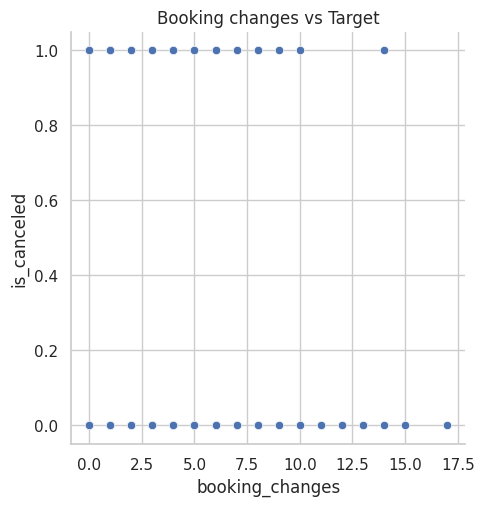

In [63]:
sns.relplot(data = df_copia, x = "booking_changes", y = "is_canceled").set(title = "Booking changes vs Target")

La distribución de las variables parece bastante uniforme hasta llegar a los 10 cambios de reserva. A partir de ahí los clientes tienden a no cancelar.

---



Creamos un gráfico de dispersión entre la variable "previous_bookings_not_canceled" y el target:

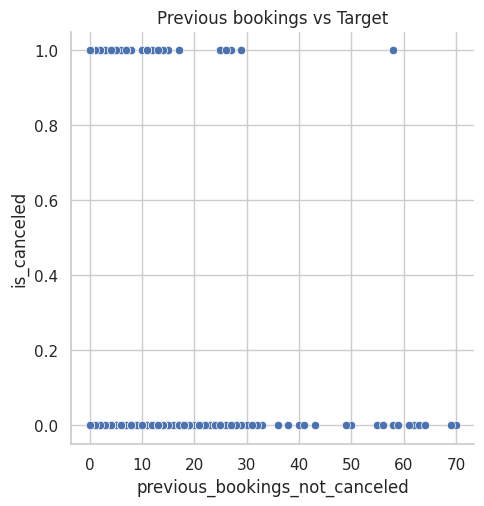

In [64]:
sns.relplot(data = df_copia, x = "previous_bookings_not_canceled", y = "is_canceled").set(title = "Previous bookings vs Target")

A partir de las 30 reservas hechas, la gran mayoría de los registros terminaron no cancelando su reserva.

---



Creamos un gráfico de dispersión entre la variable "adults" y el target:

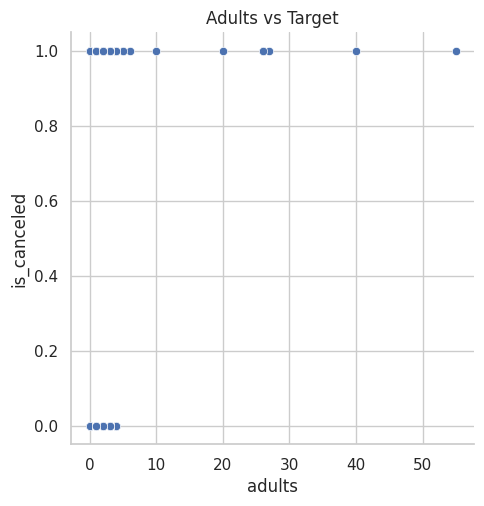

In [65]:
sns.relplot(data = df_copia, x = "adults", y = "is_canceled").set(title = "Adults vs Target")

Gran parte de los registros se concentran en valores menores de 5. Luego, con valores mayores, todos los clientes cancelaron su reserva.

---



Construimos un gráfico de dispersión entre la variable "adr" y el target:

<Figure size 1500x500 with 0 Axes>

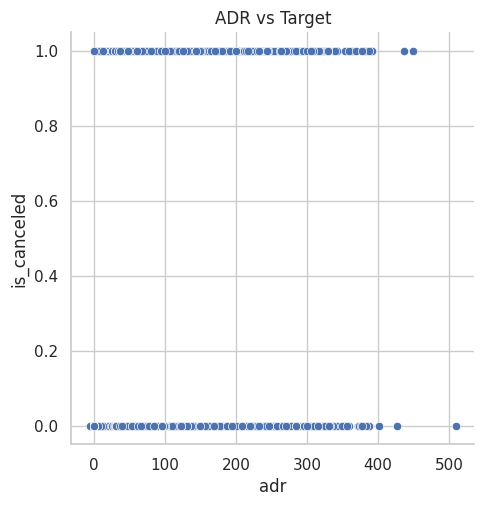

In [66]:
plt.figure(figsize = (15,5))
sns.relplot(data = df_copia, x = "adr", y = "is_canceled").set(title = "ADR vs Target")

La distribución del target se encuentra bastante balanceada durante todo el rango de valores que toma la variable 'adr'.

---



Creamos un gráfico de dispersión entre la variable "required_car_parking_spaces" y el target:

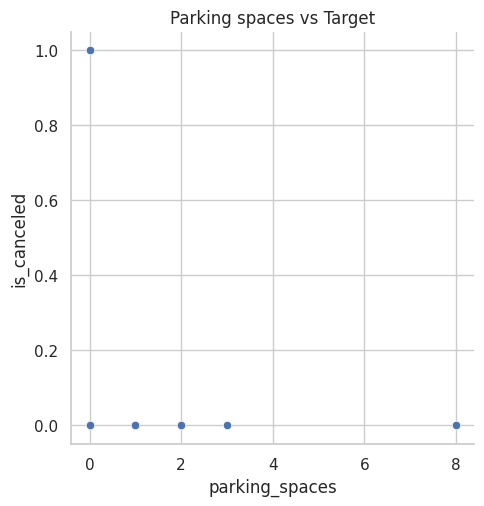

In [67]:
sns.relplot(data = df_copia, x = "parking_spaces", y = "is_canceled").set(title = "Parking spaces vs Target")

Todos los clientes que reservaron uno o más lugares de estacionamiento no cancelaron su reserva.


---



Hacemos un gráfico de dispersión entre la variable "stays_in_week_nights" y el target:

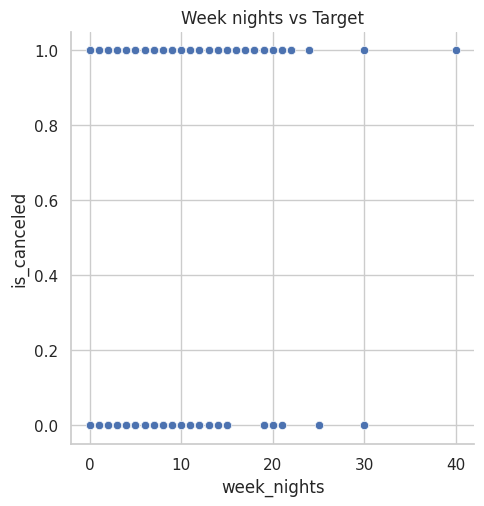

In [68]:
sns.relplot(data = df_copia, x = "week_nights", y = "is_canceled").set(title = "Week nights vs Target")

Se pueden observar algunos intervalos en los que todos los registros cancelaron. Se observa uno entre los 10 y 20 dias de semana, y otros entre los 20 y 30.

---



Construimos un gráfico de dispersión entre la variable "stays_in_weekend_nights" y el target:

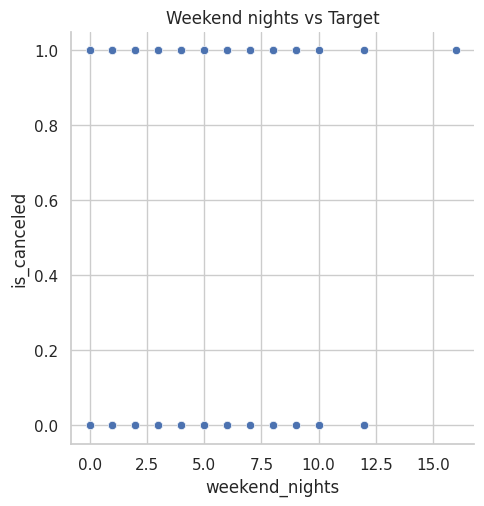

In [69]:
sns.relplot(data = df_copia, x = "weekend_nights", y = "is_canceled").set(title = "Weekend nights vs Target")

La única observación relevante que se puede realizar sobre este gráfico es el valor atípico que se encuentra pasando los 15 dias de fin de semana.

---



# Análisis de valores faltantes o inválidos

##Datos faltantes y nulos

Observamos la cantidad de datos nulos en total y para cada variable

In [70]:
print(f"En total hay {df_copia.isnull().sum().sum()} datos nulos en el dataset")

En total hay 66876 datos nulos en el dataset


In [71]:
print(df_copia.isnull().sum())

hotel                                 0
lead_time                             0
arrival_year                          0
arrival_month                         0
arrival_week                          0
arrival_day_month                     0
weekend_nights                        0
week_nights                           0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Vemos si hay datos inválidos, como pueden ser los caracetes especiales

In [72]:
# Se define la expresión regular para valores que no sean numeros ni letras
regex_pattern = r'[^a-zA-Z0-9]'

# Se aplica a todas las columnas una funciion que devuelve todas las que contienen valores invalidos
variables_con_invalidos = df_copia.apply(lambda x: x.astype(str).str.contains(regex_pattern).any(), axis=0)

print(variables_con_invalidos)

hotel                              True
lead_time                         False
arrival_year                      False
arrival_month                     False
arrival_week                      False
arrival_day_month                 False
weekend_nights                    False
week_nights                       False
adults                            False
children                           True
babies                            False
meal                              False
country                           False
market_segment                     True
distribution_channel               True
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                       True
agent                              True
company                            True
days_in_waiting_list              False


Idem para las variables numéricas

In [73]:
columnas_numericas = list(df_copia.select_dtypes(include=[np.number]).columns.values)

print(columnas_numericas)

['lead_time', 'arrival_year', 'arrival_week', 'arrival_day_month', 'weekend_nights', 'week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'parking_spaces', 'special_requests', 'is_canceled']


In [74]:
(df_copia[columnas_numericas] < 0).any().to_frame('Contiene menores que 0')

,Contiene menores que 0
lead_time,False
arrival_year,False
arrival_week,False
arrival_day_month,False
weekend_nights,False
week_nights,False
adults,False
children,False
babies,False
is_repeated_guest,False


In [75]:
print(f'{(df_copia["adr"] < 0).sum()} reserva/s tienen rendimientos negativos')

1 reserva/s tienen rendimientos negativos


### Análisis de valores nulos por columna

Conociendo la cantidad de valores nulos que tienen las variables, averiguamos qué porcentaje de ellas es el involucrado

In [76]:
# Lista con las columnas que tienen datos nulos
columnas_con_nulos = [columna for columna in df_copia.columns if df_copia[columna].isnull().any()]

print(columnas_con_nulos)

['children', 'country', 'agent', 'company']


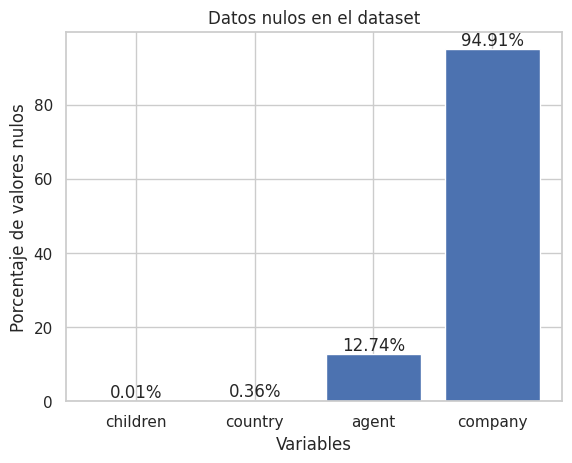

In [77]:
porcentaje_nulos_por_columna = []

for columna in columnas_con_nulos:
  nulos = df_copia[columna].isnull().sum() / len(df_copia[columna]) * 100
  porcentaje_nulos_por_columna.append(nulos)

plt.bar(columnas_con_nulos, porcentaje_nulos_por_columna)

# Etiquetas y título
plt.xlabel('Variables')
plt.ylabel('Porcentaje de valores nulos')
plt.title('Datos nulos en el dataset')

# Porcentajes sobre cada barra
for i, v in enumerate(porcentaje_nulos_por_columna):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

# Mostrar grafico
plt.show()

### Manipulación de datos faltantes

De las cuatro variables que presentan datos nulos podemos decir que Agent y Company no tienen datos faltantes, ya que, según el paper, un nulo en esas dos variables representa que la reserva no vino de una compania o un agente.

Para el caso de Children y Country, como no se justifica la presencia de datos nulos podemos considerarlos como faltantes.

In [78]:
df_filtrado = df_copia

##### Variable Children

Como son pocos registros con datos de children faltantes, los eliminamos

In [79]:
df_filtrado.dropna(subset=['children'], inplace=True)

df_filtrado['children'].isnull().sum()

0

##### Variable Country

En éste caso se completan los datos faltantes

In [80]:
df_filtrado['country'].fillna('sin_pais', inplace = True)

df_filtrado['country'].isnull().sum()

0

### Manipulación de datos nulos

##### Variable Agent

Para el caso de Agent, tiene una pequeña parte de sus datos nulos. Así que optamos por designarles una categoria particular a todos ellos.

In [81]:
df_filtrado.loc[df_filtrado['agent'] == 0]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled


Notamos que ningún registro toma como valor de Agent el numero 0, por lo tanto podemos utilizarlo para representar a todos los registros cuyo Agent sea nulo.

In [82]:
df_filtrado['agent'].fillna(0, inplace = True)

df_filtrado['agent'].isnull().sum()

0

In [83]:
df_filtrado.loc[df_filtrado['agent'] == 0]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0.0,NaN,0,Transient,42.00,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
5,City Hotel,1,2015,September,38,14,3,5,1,0.0,...,0.0,NaN,0,Transient,133.00,0,0,2015-09-22,8f62c6f7-60a5-4b54-8ced-faaf9213a7a7,0
18,Resort Hotel,162,2016,March,13,24,0,3,2,0.0,...,0.0,NaN,0,Transient-Party,84.00,0,0,2016-03-27,c2797dff-f373-47fd-a6c1-6ea6fd5d7274,0
21,Resort Hotel,9,2016,December,51,14,0,2,2,0.0,...,0.0,NaN,0,Transient,0.00,0,0,2016-12-16,b26bb222-3f15-4f54-84fd-fc1762dd47ce,0
35,Resort Hotel,364,2016,October,42,12,2,6,1,0.0,...,0.0,223.0,0,Transient-Party,60.00,0,0,2016-10-20,68deb679-eeb2-491e-98a6-0539073b4258,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61887,City Hotel,277,2016,November,46,7,1,2,2,0.0,...,0.0,NaN,0,Transient,100.00,0,0,2016-04-04,05ac7380-68c7-4875-a43a-00f8e1d2dda3,1
61891,City Hotel,11,2017,March,11,14,0,2,1,0.0,...,0.0,45.0,0,Transient,0.00,0,0,2017-03-16,bde257ba-5064-475a-8b67-52e3c49b5332,0
61892,Resort Hotel,0,2016,April,18,29,2,5,1,0.0,...,0.0,NaN,0,Transient,99.29,0,0,2016-05-06,a0f57857-dae3-4df1-9553-604380f93ff4,0
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0.0,NaN,0,Transient,149.00,0,0,2016-09-03,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0


##### Variable Company

Al tener la gran mayoría de los datos de la columna nulos (El 95%), no vale la pena realizar ningún tipo de imputacion. Por lo tanto decidimos simplemente eliminar la columna.

In [84]:
df_filtrado.drop('company', axis='columns', inplace=True)

##Datos inválidos

###Week y Weekend nights

Analizamos posibles valores inválidos para estas dos variables:

In [85]:
df_filtrado[(df_filtrado['weekend_nights'] == 0) & (df_filtrado['week_nights'] == 0) ]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
393,City Hotel,0,2016,May,21,17,0,0,2,0.0,...,No Deposit,6.0,0,Transient,0.0,0,0,2016-05-17,02a4c88e-79b0-4afe-9f21-39dcbcb977ad,0
1131,Resort Hotel,0,2017,February,7,12,0,0,1,0.0,...,No Deposit,240.0,0,Transient,0.0,0,0,2017-02-12,833c0f31-dedd-4cc5-9baa-5ffbc0ac1011,1
1454,Resort Hotel,1,2015,October,43,21,0,0,1,0.0,...,No Deposit,0.0,0,Transient,0.0,0,0,2015-10-21,759a6c13-88d0-4522-bf3b-a815d7f581f4,0
1551,City Hotel,32,2016,November,47,15,0,0,1,0.0,...,No Deposit,7.0,0,Transient,0.0,0,1,2016-11-15,0d630779-e22a-400b-9c09-10586ffceab3,0
1731,Resort Hotel,0,2017,May,19,8,0,0,2,0.0,...,No Deposit,0.0,0,Transient,0.0,0,0,2017-05-08,d537e8ad-9ddd-453d-83b4-41f8a3a8487f,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60941,City Hotel,0,2015,November,48,23,0,0,2,0.0,...,No Deposit,8.0,0,Transient,0.0,0,0,2015-11-23,f5c99bf4-1a25-484e-ae35-025fc9e8f0d0,0
61008,City Hotel,36,2016,July,30,20,0,0,2,2.0,...,No Deposit,9.0,0,Transient,0.0,0,3,2016-07-20,f09a0405-93f7-4a9e-b2a1-67338872a801,0
61180,City Hotel,1,2017,June,26,28,0,0,1,0.0,...,No Deposit,0.0,0,Transient,0.0,0,0,2017-06-28,57d6de79-992a-4143-a4c8-3ce6613449b5,0
61514,Resort Hotel,1,2016,February,8,16,0,0,2,0.0,...,No Deposit,0.0,0,Transient,0.0,1,0,2016-02-16,120d6128-d09e-4f46-a2f2-2a8814304739,0


Encontramos que hay 297 registros donde tanto "week_nights" como "weekend_nights" valen 0. Lo cual es un valor inválido ya que se estaría registrando una fila en la que el huesped no se queda ningún dia, ni de semana ni fin de semana.

In [86]:
print(f"El porcentaje de la muestra con respecto al dataframe es de {len(df_filtrado[(df_filtrado['weekend_nights'] == 0) & (df_filtrado['week_nights'] == 0)])*100 / len(df_filtrado['week_nights'])}%.")

El porcentaje de la muestra con respecto al dataframe es de 0.47973638727810175%.


Si bien es una cantidad bastante despreciable decidimos imputar los valores por su mediana.

In [87]:
df_filtrado[(df_filtrado['weekend_nights'] == 0) & (df_filtrado['week_nights'] == 0)]['week_nights'].replace(0,np.median(df_filtrado['week_nights']))
df_filtrado[(df_filtrado['weekend_nights'] == 0) & (df_filtrado['week_nights'] == 0)]['weekend_nights'].replace(0,np.median(df_filtrado['weekend_nights']))

393      1
1131     1
1454     1
1551     1
1731     1
        ..
60941    1
61008    1
61180    1
61514    1
61771    1
Name: weekend_nights, Length: 297, dtype: int64

In [88]:
df_filtrado['week_nights'].describe()

count    61909.000000
mean         2.510071
std          1.884931
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: week_nights, dtype: float64

In [89]:
df_filtrado['weekend_nights'].describe()

count    61909.000000
mean         0.924147
std          0.993110
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: weekend_nights, dtype: float64

###ADR

Buscamos valores negativos para la variable ADR, valores que no tendrían sentido para lo que representa la misma.

In [90]:
df_filtrado[df_filtrado['adr'] < 0]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
21124,Resort Hotel,195,2017,March,10,5,4,6,2,0.0,...,No Deposit,273.0,0,Transient-Party,-6.38,0,0,2017-03-15,869f627f-35fb-42b0-8376-12869739d76e,0


Como encontramos uno decidimos simplemente eliminarlo.

In [91]:
df_filtrado.drop(df_filtrado[df_filtrado['adr'] < 0].index, inplace = True)

###Adult

Queremos buscar si existen registros donde la variable Adults es igual a 0, ya que eso sería un valor inválido para nuestro análisis. No debería existir ninguna fila donde no se registre ningún adulto.

In [92]:
df_filtrado[df_filtrado['adults'] == 0]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
96,City Hotel,23,2016,May,21,21,2,4,0,2.0,...,No Deposit,9.0,0,Transient,128.49,0,0,2016-05-05,dcaf076d-bd38-47dd-8d9d-16be09cd5b08,1
212,City Hotel,315,2017,July,27,7,0,1,0,2.0,...,No Deposit,9.0,0,Transient,91.85,0,2,2016-09-19,55c9b5f9-b5d0-49a2-9348-c6476a0bd772,1
270,City Hotel,4,2017,February,8,21,0,3,0,0.0,...,No Deposit,0.0,0,Transient-Party,0.00,0,0,2017-02-17,6a48e05e-c36a-41d0-b7e0-5f8b92dab109,1
326,City Hotel,53,2016,November,49,29,0,4,0,2.0,...,No Deposit,9.0,0,Transient,77.86,0,2,2016-12-03,74fe3153-e2ae-4650-a375-05fc52881a56,0
464,City Hotel,64,2015,October,42,16,2,3,0,0.0,...,No Deposit,50.0,0,Transient-Party,0.00,0,0,2015-10-21,cfe370c2-298a-4de8-82fd-f8d418febd7f,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,City Hotel,44,2016,February,7,8,1,3,0,2.0,...,No Deposit,9.0,0,Transient-Party,66.50,0,1,2016-01-26,8b700cc2-903e-4400-9c68-aba04d69de38,1
60837,City Hotel,33,2017,May,19,9,0,1,0,0.0,...,No Deposit,87.0,0,Transient,200.00,0,0,2017-05-10,070652d9-948b-47a3-bb96-113627bb5558,0
60994,City Hotel,11,2016,August,34,19,0,1,0,2.0,...,No Deposit,9.0,0,Transient,127.60,0,1,2016-08-20,17552f62-53e5-4bdf-877d-c2b9769ec27a,0
61003,City Hotel,57,2016,November,46,9,0,2,0,0.0,...,No Deposit,14.0,0,Transient,165.38,0,2,2016-11-11,c6b4f9bb-b1f7-4765-a4af-5846748c13f4,0


In [93]:
print(f"El porcentaje de la muestra con respecto al dataframe es de {len(df_filtrado.loc[df_filtrado['adults'] == 0])*100 / len(df_filtrado['adults'])}%.")

El porcentaje de la muestra con respecto al dataframe es de 0.3182141241842734%.


Al ser pocos los registros con este valor, tomamos la decision de eliminar las filas.

In [94]:
df_filtrado.drop(df_filtrado[df_filtrado['adults'] == 0].index, inplace = True)
len(df_filtrado[df_filtrado['adults'] == 0])

0

##Resultado Dataset filtrado:

In [95]:
df_filtrado.describe()

,lead_time,arrival_year,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,parking_spaces,special_requests,is_canceled
count,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000,61711.000000
mean,112.296252,2016.154592,27.212701,15.784965,0.923936,2.509893,1.868711,0.101262,0.007162,0.027661,0.115101,0.115620,0.194358,73.926917,2.643564,102.541602,0.050088,0.522938,0.500105
std,110.744062,0.708597,13.519210,8.794728,0.992607,1.882911,0.580517,0.394300,0.092222,0.164001,0.995285,1.398393,0.605127,106.196744,18.636550,47.673399,0.221300,0.775007,0.500004
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000,1.000000
75%,172.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,391.000000,510.000000,8.000000,5.000000,1.000000


In [96]:
df_copia = df_filtrado

# Análisis de valores atípicos

Del análisis hecho en los gráficos de distribución de variables podemos mencionar aquellas donde se encontraron, muy probablemente, outliers o valores atípicos:



---




adr, lead_time, week_nights, weekend_nights, adults, children, babies, previous_cancellations, previous_bookings_not_canceled, booking_changes, parking_spaces.





---



## Análisis univariado

Volveremos a mostrar los gráficos de distribución para trabajar de forma más cómoda.

### Caso ADR

[Text(0.5, 1.0, 'Boxplot variable adr'), Text(0, 0.5, 'ADR')]

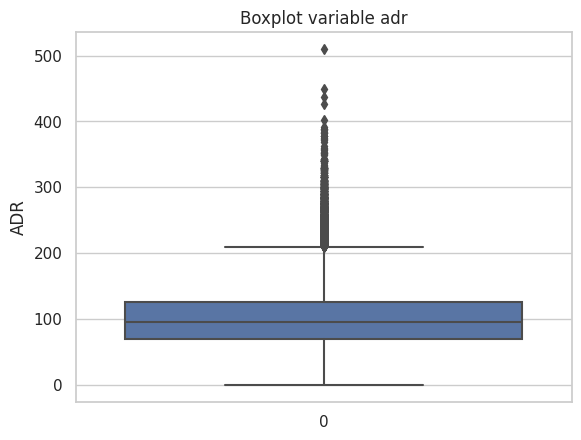

In [97]:
sns.boxplot(df_copia['adr']).set(title = 'Boxplot variable adr',ylabel = 'ADR')


In [98]:
df_copia['adr'].describe()

count    61711.000000
mean       102.541602
std         47.673399
min          0.000000
25%         70.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

In [99]:
Q1 = np.quantile(df_copia['adr'],0.25)
Q3 = np.quantile(df_copia['adr'],0.75)

IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

print(min)
print(max)


-14.0
210.0


Analizamos los valores atípicos:

In [100]:
df_copia[df_copia['adr'] > 300]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
238,Resort Hotel,38,2017,August,32,7,1,5,2,1.0,...,No Deposit,250.0,0,Transient,302.5,0,1,2017-08-13,988bf050-6aa8-4211-ac09-752c4e58bcbd,0
439,City Hotel,21,2017,July,27,6,0,1,2,2.0,...,No Deposit,9.0,0,Transient,307.0,0,0,2017-06-15,f4330103-9555-4f10-b40b-52fc138e341c,1
684,Resort Hotel,47,2017,August,32,12,2,3,3,1.0,...,No Deposit,240.0,0,Transient,340.0,0,0,2017-08-07,32635698-ea93-4169-9bd6-2addd2567b8f,1
774,Resort Hotel,31,2016,December,53,30,0,2,2,0.0,...,No Deposit,0.0,0,Transient-Party,305.0,0,1,2017-01-01,5d3926a2-bede-4452-af7b-bd5100091a97,0
1251,Resort Hotel,16,2016,August,32,5,0,2,3,1.0,...,No Deposit,240.0,0,Transient-Party,352.0,0,0,2016-08-07,ca2c9b3f-d5d3-4351-8a7e-4480b616766a,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60071,Resort Hotel,104,2017,August,33,17,2,3,3,1.0,...,No Deposit,240.0,0,Transient,402.0,0,1,2017-08-22,7948179b-85f7-4764-ae7e-3647bf1693f8,0
60771,Resort Hotel,10,2016,August,34,20,1,1,2,1.0,...,No Deposit,250.0,0,Transient,300.6,1,0,2016-08-22,7477661e-1056-4da4-8196-641f2d49dc18,0
61452,Resort Hotel,8,2017,August,31,5,0,1,2,2.0,...,Non Refund,240.0,0,Transient,330.0,0,0,2017-08-01,ee9c48d4-bfbf-4eb4-91b0-4474886437e8,1
61745,Resort Hotel,205,2017,August,31,2,1,4,2,2.0,...,No Deposit,240.0,0,Transient,300.4,0,2,2017-01-17,f4bd2623-14df-4912-8abf-b698381ac634,1


Podemos ver que hay 144 registros que tienen un ADR mayor a 300, el cual es un valor atípico, se aleja bastante de la media.

In [101]:
print(f"El porcentaje de la muestra con respecto al dataframe es de {len(df_copia.loc[df_copia['adr'] > 300])*100 / len(df_copia['adr'])}%.")

El porcentaje de la muestra con respecto al dataframe es de 0.23334575683427589%.


Es un porcentaje muy despreciable, así que nos tomamos la libertad de eliminar estos registros.

In [102]:
df_copia = df_copia.drop(df_copia[df_copia['adr'] > 300].index)

In [103]:
df_copia['adr'].describe()

count    61567.000000
mean       102.008451
std         46.409031
min          0.000000
25%         70.000000
50%         95.000000
75%        126.000000
max        300.000000
Name: adr, dtype: float64

Finalmente vemos como quedó el boxplot de la variable luego de los cambios hechos.

[Text(0.5, 1.0, 'Boxplot variable adr'), Text(0, 0.5, 'ADR')]

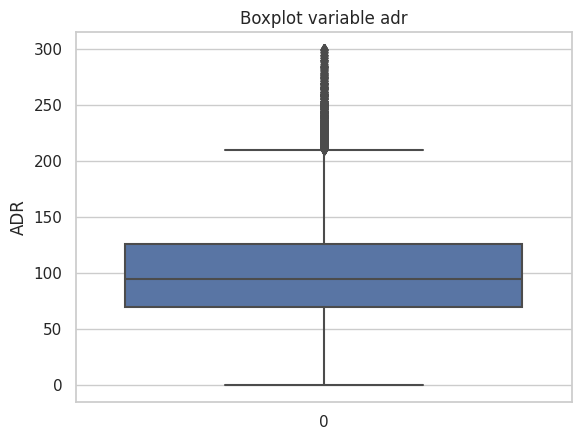

In [104]:
sns.boxplot(df_copia['adr']).set(title = 'Boxplot variable adr',ylabel = 'ADR')

### Caso Lead Time

[Text(0.5, 1.0, 'Boxplot variable lead_time'), Text(0, 0.5, 'Lead time')]

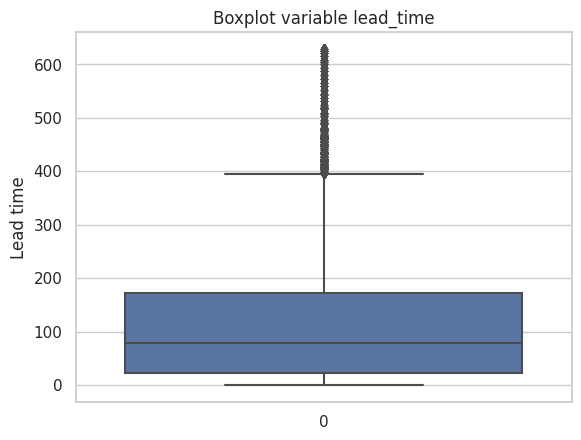

In [105]:
sns.boxplot(df_copia['lead_time']).set(title = 'Boxplot variable lead_time', ylabel = 'Lead time')

In [106]:
df_copia['lead_time'].describe()

count    61567.000000
mean       112.373252
std        110.790706
min          0.000000
25%         23.000000
50%         78.000000
75%        172.000000
max        629.000000
Name: lead_time, dtype: float64

In [107]:
Q1 = np.quantile(df_copia['lead_time'],0.25)
Q3 = np.quantile(df_copia['lead_time'],0.75)

IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

print(min)
print(max)

-200.5
395.5


In [108]:
df_copia[df_copia['lead_time'] < 0]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled


In [109]:
df_copia[df_copia['lead_time'] >= 400]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
15,City Hotel,465,2017,July,30,26,0,3,2,0.0,...,No Deposit,229.0,0,Transient-Party,112.67,0,0,2017-07-18,d73d9a15-bcb1-441e-9571-56cbdde0e670,1
51,City Hotel,489,2016,November,46,10,0,2,2,0.0,...,Non Refund,1.0,0,Transient,62.80,0,0,2015-10-21,264b4bdc-1f93-41dc-bad8-381405061cb1,1
82,City Hotel,412,2016,August,35,25,0,2,2,0.0,...,Non Refund,1.0,0,Transient,62.00,0,0,2015-10-21,29230190-f1d1-4d9e-90ec-d9d4a0755cfd,1
95,City Hotel,454,2016,October,41,6,0,2,2,0.0,...,Non Refund,1.0,0,Transient,62.00,0,0,2015-10-21,11de0e85-b5c6-4876-96b7-37c65f479ec5,1
99,City Hotel,420,2016,September,36,3,2,2,2,0.0,...,Non Refund,35.0,0,Transient,75.00,0,0,2015-10-12,14d571b1-1cf3-4058-b50a-46367cd4f47e,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61753,City Hotel,433,2016,September,37,8,0,3,2,0.0,...,Non Refund,3.0,0,Transient,70.00,0,0,2015-10-20,29a08da1-e707-4bd4-bbfe-ca55c19b7c3b,1
61761,City Hotel,496,2016,November,47,17,0,2,2,0.0,...,Non Refund,1.0,0,Transient,62.80,0,0,2015-10-21,159515de-2c06-41b2-8364-f34ddee5e1c6,1
61768,City Hotel,433,2016,September,38,15,0,2,2,0.0,...,Non Refund,1.0,0,Transient,62.00,0,0,2015-10-21,6f8bfdd6-6c76-449c-8ef4-ba22b2ece17c,1
61783,City Hotel,454,2016,October,41,6,0,2,2,0.0,...,Non Refund,1.0,0,Transient,62.00,0,0,2015-10-21,5e1faaa8-cf26-4e74-bc1f-0fbcbfe65c01,1


In [110]:
print(f"El porcentaje de la muestra con respecto al dataframe es de {len(df_copia.loc[df_copia['lead_time'] >= 400])*100 / len(df_copia['lead_time'])}%.")

El porcentaje de la muestra con respecto al dataframe es de 2.0969025614371337%.


Observamos cuanto cambiaría su distribucion si eliminamos todos los outliers.

In [111]:
df_temporal = df_copia['lead_time'].drop(df_copia[df_copia['lead_time'] >= 400].index)
df_temporal.describe()

count    60276.000000
mean       104.690291
std         98.178699
min          0.000000
25%         22.000000
50%         75.000000
75%        165.000000
max        399.000000
Name: lead_time, dtype: float64

Si bien no es una cifra despreciable, preferimos eliminar los datos atípicos para facilitar análisis posteriores.

In [112]:
df_copia.drop(df_copia[df_copia['lead_time'] >= 400].index, inplace = True)

[Text(0.5, 1.0, 'Boxplot variable lead_time'), Text(0, 0.5, 'Lead time')]

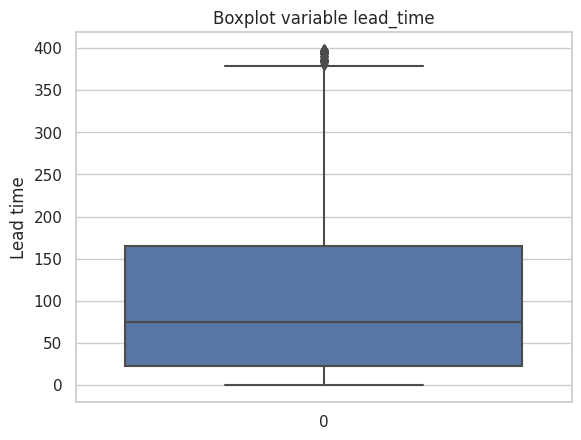

In [113]:
sns.boxplot(df_copia['lead_time']).set(title = 'Boxplot variable lead_time', ylabel = 'Lead time')

### Casos Week y Weekend nights

#### Week nights

[Text(0.5, 1.0, 'Boxplot variable week_nights'), Text(0, 0.5, 'Week nights')]

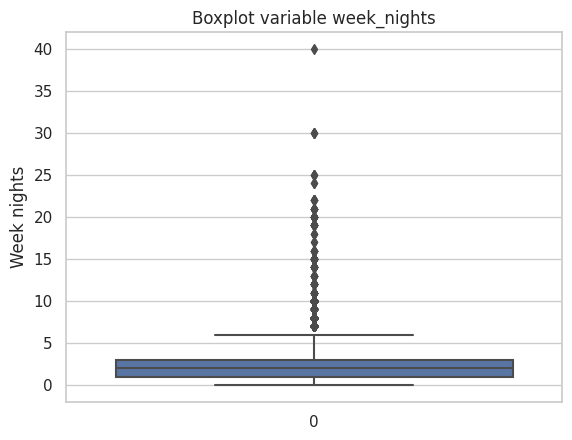

In [114]:
sns.boxplot(df_copia['week_nights']).set(title = 'Boxplot variable week_nights', ylabel = 'Week nights')

In [115]:
df_copia['week_nights'].describe()

count    60276.000000
mean         2.519759
std          1.895501
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: week_nights, dtype: float64

In [116]:
Q1 = np.quantile(df_copia['week_nights'],0.25)
Q3 = np.quantile(df_copia['week_nights'],0.75)

IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

print(min)
print(max)

-2.0
6.0


In [117]:
df_copia[df_copia['week_nights'] > 10]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
454,Resort Hotel,181,2017,March,9,1,6,19,2,0.0,...,No Deposit,440.0,0,Transient-Party,58.60,0,0,2016-12-07,d24d57c2-23a1-4a34-b634-451e7db42031,1
752,Resort Hotel,113,2015,July,29,14,4,11,3,0.0,...,No Deposit,0.0,0,Transient,187.50,1,3,2015-07-29,1684b572-fa18-4387-820d-36f8885de946,0
1321,Resort Hotel,162,2016,March,10,4,6,15,2,0.0,...,Non Refund,96.0,0,Transient,82.00,0,0,2015-11-03,d738b2cd-178c-4f0c-a26f-6ebcb1c0e971,1
1433,City Hotel,9,2016,January,5,28,6,17,1,0.0,...,No Deposit,9.0,0,Transient,68.23,0,1,2016-01-28,611c14b4-1751-4f6b-8a07-ab9270a29cc5,1
1485,City Hotel,92,2015,December,49,1,4,15,1,0.0,...,No Deposit,9.0,0,Contract,63.75,0,1,2015-11-19,c6289f57-01ff-4a12-8ff3-ff7c92cc6b1f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61044,Resort Hotel,98,2017,February,6,8,6,15,2,0.0,...,No Deposit,96.0,0,Transient,37.80,0,0,2017-01-19,11f019dd-f851-44fe-ad89-1070dab12a4b,1
61210,Resort Hotel,159,2017,March,11,14,6,15,2,0.0,...,No Deposit,75.0,0,Transient,68.40,0,1,2017-04-04,c566e69b-2f23-4cd5-a661-27dbf5b67fe9,0
61619,Resort Hotel,144,2017,March,11,14,4,14,2,0.0,...,No Deposit,440.0,0,Transient-Party,62.00,0,0,2017-01-10,677550e4-dc4f-4763-8f38-8365c4ce910f,1
61691,City Hotel,81,2015,August,32,3,5,12,2,0.0,...,No Deposit,9.0,0,Transient,76.50,0,1,2015-05-18,c0cfb016-2568-408a-9662-9be32c236174,1


In [118]:
print(f"El porcentaje de la muestra con respecto al dataframe es de {len(df_copia.loc[df_copia['week_nights'] > 10])*100 / len(df_copia['week_nights'])}%.")

El porcentaje de la muestra con respecto al dataframe es de 0.35835158271949036%.


Como es un porcentaje muy pequeño decidimos borrar estos registros.

In [119]:
df_copia.drop(df_copia[df_copia['week_nights'] > 10].index, inplace = True)

In [120]:
df_copia['week_nights'].describe()

count    60060.000000
mean         2.471528
std          1.700636
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: week_nights, dtype: float64

[Text(0.5, 1.0, 'Boxplot variable week_nights'), Text(0, 0.5, 'Week nights')]

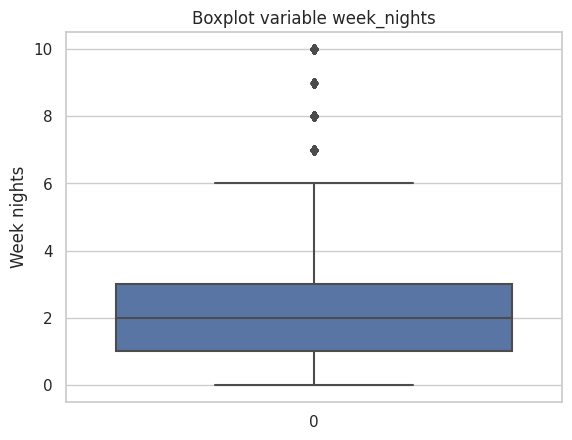

In [121]:
sns.boxplot(df_copia['week_nights']).set(title = 'Boxplot variable week_nights', ylabel = 'Week nights')

#### Weekend nights

[Text(0.5, 1.0, 'Boxplot variable weekend_nights'),
 Text(0, 0.5, 'Weekend nights')]

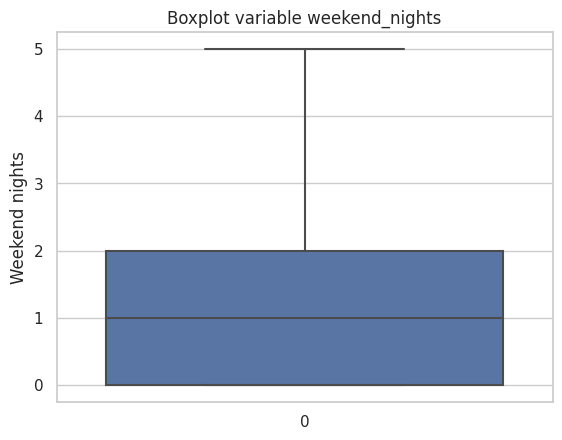

In [122]:
sns.boxplot(df_copia['weekend_nights']).set(title = 'Boxplot variable weekend_nights', ylabel = 'Weekend nights')

In [123]:
df_copia['weekend_nights'].describe()

count    60060.000000
mean         0.914486
std          0.940626
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: weekend_nights, dtype: float64

Al eliminar los outliers de la variable anterior, Week Nights, también se eliminaron los valores atípicos de esta, ya que están correlacionadas entre sí.


Por lo tanto no hay ningún análisis que hacer.

### Casos Edades

#### Adults

[Text(0.5, 1.0, 'Distribucion de la variable adults'), Text(0.5, 0, 'Adults')]

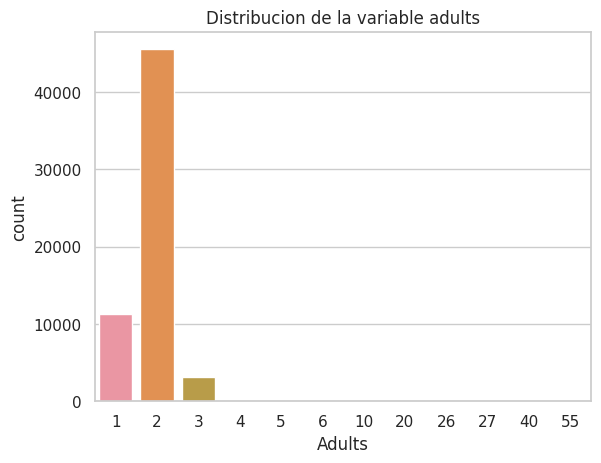

In [124]:
sns.countplot(data = df_copia, x = "adults").set(title = "Distribucion de la variable adults", xlabel = "Adults")

Este es el gráfico visto en un countplot, también se puede visualizar en un boxplot pero elegimos mostralo primero de esta manera ya que es visualmente más agradable. Igualmente, abajo se visualiza el boxplot.

[Text(0.5, 1.0, 'Distribucion de la variable adults')]

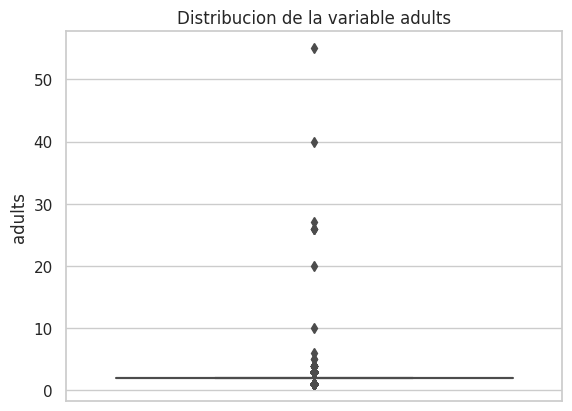

In [125]:
sns.boxplot(data = df_copia, y = "adults").set(title = "Distribucion de la variable adults")

In [126]:
df_copia['adults'].describe()

count    60060.000000
mean         1.867499
std          0.585083
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

Calculamos su Z-Score

In [127]:
df_copia['zscore_adults'] = st.zscore(df_copia['adults'])
df_copia.loc[:,["adults", "zscore_adults"]]

,adults,zscore_adults
0,1,-1.482705
1,2,0.226467
2,2,0.226467
3,2,0.226467
4,2,0.226467
...,...,...
61908,2,0.226467
61909,1,-1.482705
61910,1,-1.482705
61911,2,0.226467


Observamos los límites:

In [128]:
df_copia[df_copia['zscore_adults'] > 3].loc[:,["adults", "zscore_adults"]]

,adults,zscore_adults
2051,4,3.644811
2291,4,3.644811
3962,5,5.353983
4064,40,65.175003
4730,4,3.644811
11551,4,3.644811
11830,20,30.991563
12873,4,3.644811
13101,6,7.063155
17204,4,3.644811


In [129]:
df_copia[df_copia['zscore_adults'] < -3].loc[:,["adults", "zscore_adults"]]

,adults,zscore_adults


Son muy pocos los registros que se escapan del rango permitido por el Z-Score, por lo que decidimos eliminarlos.

In [130]:
df_copia.drop(df_copia[df_copia['zscore_adults'] > 3].index, inplace = True)

In [131]:
df_copia['adults'].describe()

count    60020.000000
mean         1.862712
std          0.471426
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: adults, dtype: float64

In [132]:
df_copia.drop("zscore_adults", axis = 1, inplace = True)

[Text(0.5, 1.0, 'Distribucion de la variable adults')]

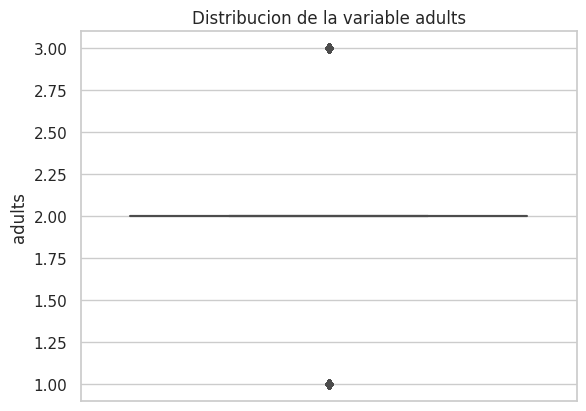

In [133]:
sns.boxplot(data = df_copia, y = "adults").set(title = "Distribucion de la variable adults")

#### Children

[Text(0.5, 1.0, 'Distribucion de la variable children'),
 Text(0.5, 0, 'Children')]

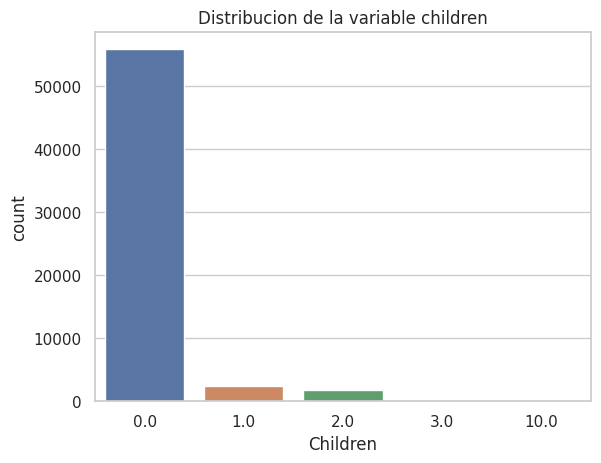

In [134]:
sns.countplot(data = df_copia, x = "children").set(title = "Distribucion de la variable children", xlabel = "Children")

[Text(0.5, 1.0, 'Distribucion de la variable children')]

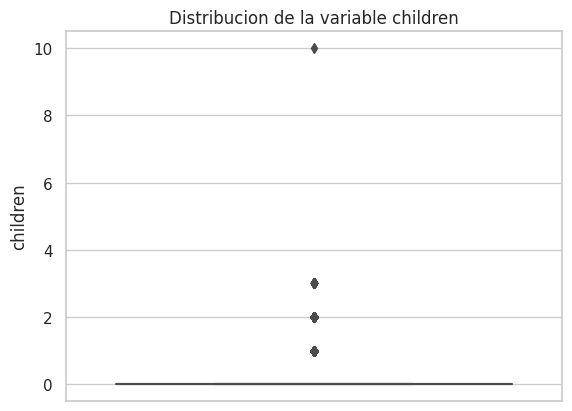

In [135]:
sns.boxplot(data = df_copia, y = "children").set(title = "Distribucion de la variable children")

In [136]:
df_copia['children'].describe()

count    60020.000000
mean         0.100916
std          0.393167
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

Calculamos su Z-Score

In [137]:
df_copia['zscore_children'] = st.zscore(df_copia['children'])
df_copia.loc[:,["children", "zscore_children"]]

,children,zscore_children
0,0.0,-0.256678
1,0.0,-0.256678
2,2.0,4.830263
3,0.0,-0.256678
4,0.0,-0.256678
...,...,...
61908,0.0,-0.256678
61909,0.0,-0.256678
61910,0.0,-0.256678
61911,0.0,-0.256678


Miramos los extremos:

In [138]:
df_copia[df_copia['zscore_children'] > 3].loc[:,["children", "zscore_children"]]

,children,zscore_children
2,2.0,4.830263
71,2.0,4.830263
111,2.0,4.830263
143,2.0,4.830263
188,2.0,4.830263
...,...,...
61819,2.0,4.830263
61828,2.0,4.830263
61845,2.0,4.830263
61889,2.0,4.830263


In [139]:
print(f"El porcentaje de la muestra con respecto al dataframe es de {len(df_copia.loc[df_copia['zscore_children'] > 3])*100 / len(df_copia['zscore_children'])}%.")

El porcentaje de la muestra con respecto al dataframe es de 3.008997000999667%.


Es un porcentaje bastante alto por lo que subimos el Z-Score para filtrar.

In [140]:
df_copia[df_copia['zscore_children'] > 5].loc[:,["children", "zscore_children"]]

,children,zscore_children
481,3.0,7.373733
669,3.0,7.373733
772,3.0,7.373733
5549,3.0,7.373733
5915,3.0,7.373733
8197,3.0,7.373733
9054,3.0,7.373733
11077,3.0,7.373733
16154,3.0,7.373733
17732,3.0,7.373733


Podemos eliminar todos estos registros.

In [141]:
df_copia.drop(df_copia[df_copia['zscore_children'] > 5].index, inplace = True)

In [142]:
df_copia[df_copia['zscore_children'] < -3]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,agent,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled,zscore_children


In [143]:
df_copia.drop("zscore_children", axis = 1, inplace = True)

In [144]:
df_copia['children'].describe()

count    59986.000000
mean         0.099156
std          0.385237
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: children, dtype: float64

[Text(0.5, 1.0, 'Distribucion de la variable children')]

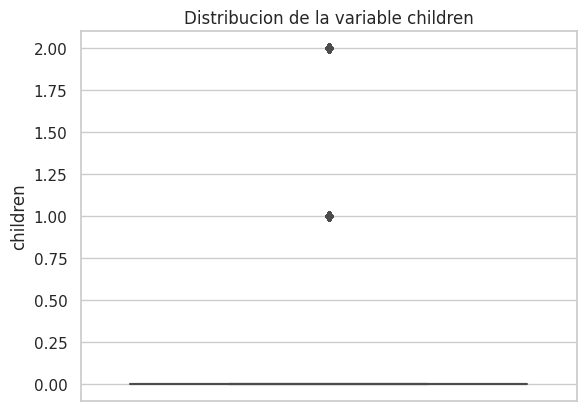

In [145]:
sns.boxplot(data = df_copia, y = "children").set(title = "Distribucion de la variable children")

#### Babies

[Text(0.5, 1.0, 'Distribucion de la variable babies'), Text(0.5, 0, 'Babies')]

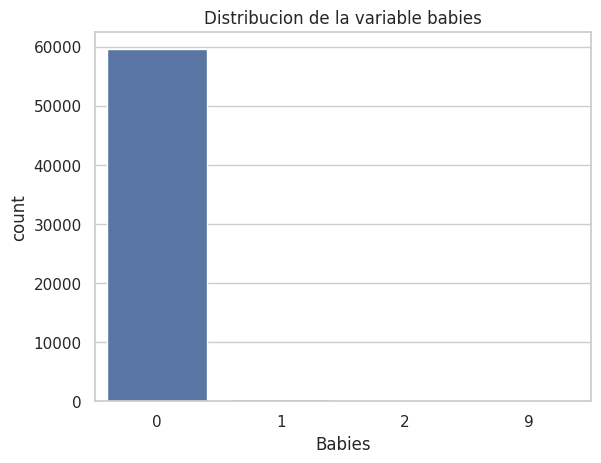

In [146]:
sns.countplot(data = df_copia, x = "babies").set(title = "Distribucion de la variable babies", xlabel = "Babies")

[Text(0.5, 1.0, 'Distribucion de la variable babies')]

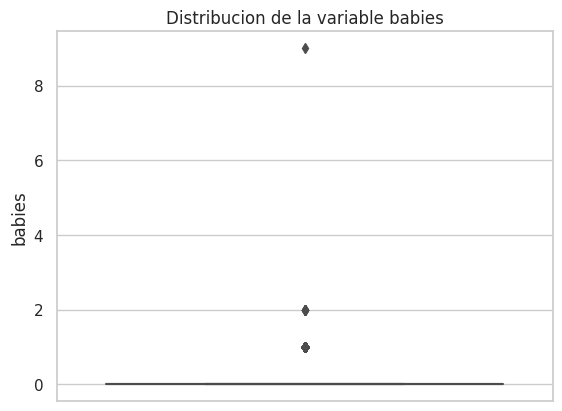

In [147]:
sns.boxplot(data = df_copia, y = "babies").set(title = "Distribucion de la variable babies")

In [148]:
df_copia['babies'].describe()

count    59986.000000
mean         0.007268
std          0.093002
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: babies, dtype: float64

Calculamos el Z-Score

In [149]:
df_copia['zscore_babies'] = st.zscore(df_copia['babies'])
df_copia.loc[:,["babies", "zscore_babies"]]

,babies,zscore_babies
0,0,-0.078154
1,0,-0.078154
2,0,-0.078154
3,0,-0.078154
4,0,-0.078154
...,...,...
61908,0,-0.078154
61909,0,-0.078154
61910,0,-0.078154
61911,0,-0.078154


In [150]:
df_copia[df_copia['zscore_babies'] > 3].loc[:,["babies", "zscore_babies"]]

,babies,zscore_babies
147,1,10.674409
184,1,10.674409
262,1,10.674409
621,1,10.674409
704,1,10.674409
...,...,...
61454,1,10.674409
61597,1,10.674409
61632,1,10.674409
61637,1,10.674409


Representan un porcentaje muy despreciable con respecto al dataset por lo que se pueden eliminar.

In [151]:
df_copia.drop(df_copia[df_copia['zscore_babies'] > 3].index, inplace = True)

In [152]:
df_copia[df_copia['zscore_babies'] < -3].loc[:,["babies", "zscore_babies"]]

,babies,zscore_babies


In [153]:
df_copia.drop("zscore_babies", axis = 1, inplace = True)

In [154]:
df_copia['babies'].describe()

count    59565.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: babies, dtype: float64

[Text(0.5, 1.0, 'Distribucion de la variable babies')]

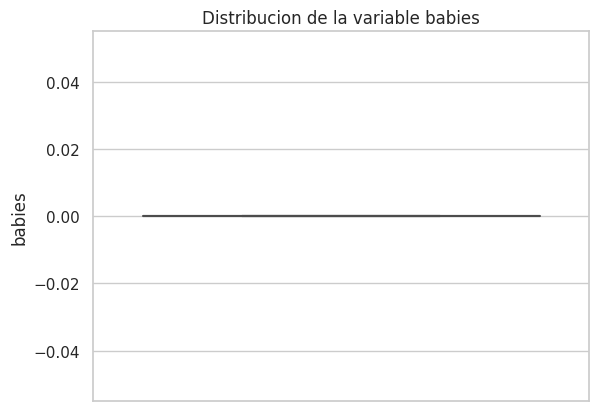

In [155]:
sns.boxplot(data = df_copia, y = "babies").set(title = "Distribucion de la variable babies")

### Caso Previous cancellations

[Text(0.5, 1.0, 'Distribucion de la variable previous_cancellations'),
 Text(0.5, 0, 'Previous cancellations')]

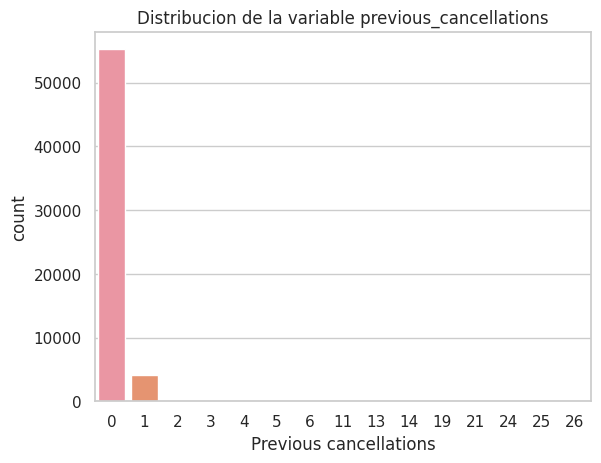

In [156]:
sns.countplot(data = df_copia, x = "previous_cancellations").set(title = "Distribucion de la variable previous_cancellations", xlabel = "Previous cancellations")

[Text(0.5, 1.0, 'Distribucion de la variable previous_cancellations')]

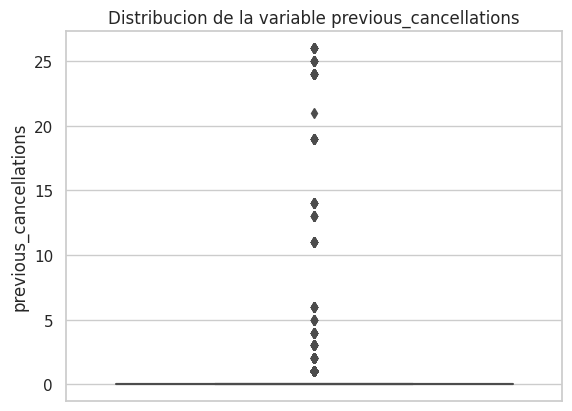

In [157]:
sns.boxplot(data = df_copia, y = "previous_cancellations").set(title = "Distribucion de la variable previous_cancellations")

In [158]:
df_copia['previous_cancellations'].describe()

count    59565.000000
mean         0.117922
std          1.012295
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

Calculamos su Z-Score

In [159]:
df_copia['z_prev_cancel'] = st.zscore(df_copia['previous_cancellations'])
df_copia.loc[:,["previous_cancellations", "z_prev_cancel"]]

,previous_cancellations,z_prev_cancel
0,0,-0.11649
1,0,-0.11649
2,0,-0.11649
3,0,-0.11649
4,0,-0.11649
...,...,...
61908,0,-0.11649
61909,0,-0.11649
61910,0,-0.11649
61911,0,-0.11649


Analizo los Scores borde:

In [160]:
df_copia[df_copia['z_prev_cancel'] > 3].loc[:,["previous_cancellations", "z_prev_cancel"]]

,previous_cancellations,z_prev_cancel
152,26,25.567930
337,19,18.652894
349,4,3.834959
802,26,25.567930
1579,11,10.749995
...,...,...
59717,14,13.713582
59761,24,23.592206
59879,11,10.749995
60138,25,24.580068


También, son muy pocos registros, por lo que vale la pena eliminarlos directamente.

In [161]:
df_copia.drop(df_copia[df_copia['z_prev_cancel'] > 3].index, inplace = True)

In [162]:
df_copia[df_copia['z_prev_cancel'] < -3].loc[:,["previous_cancellations", "z_prev_cancel"]]

,previous_cancellations,z_prev_cancel


In [163]:
df_copia['previous_cancellations'].describe()

count    59403.000000
mean         0.072017
std          0.268797
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: previous_cancellations, dtype: float64

In [164]:
df_copia.drop("z_prev_cancel", axis = 1, inplace = True)

[Text(0.5, 1.0, 'Distribucion de la variable previous_cancellations')]

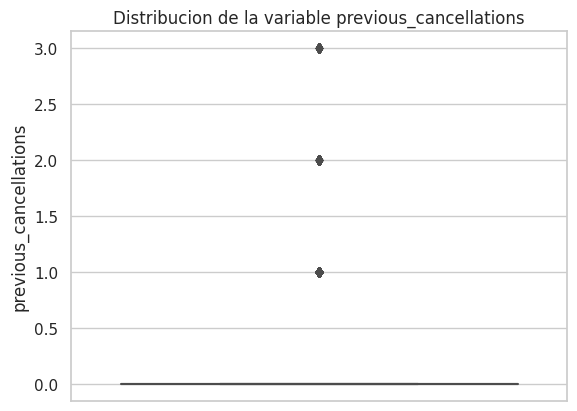

In [165]:
sns.boxplot(data = df_copia, y = "previous_cancellations").set(title = "Distribucion de la variable previous_cancellations")

### Caso Previous bookings not canceled

[Text(0.5, 1.0, 'Distribución de la variable previous_bookings_not_canceled')]

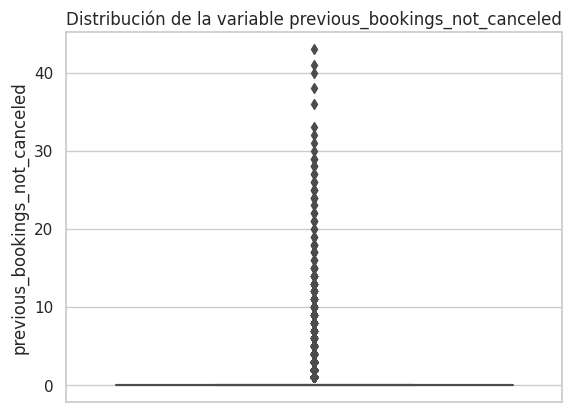

In [166]:
sns.boxplot(df_copia, y = "previous_bookings_not_canceled").set(title = 'Distribución de la variable previous_bookings_not_canceled')

In [167]:
df_copia['previous_bookings_not_canceled'].describe()

count    59403.000000
mean         0.097891
std          1.038676
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         43.000000
Name: previous_bookings_not_canceled, dtype: float64

In [168]:
Q1 = np.quantile(df_copia['previous_bookings_not_canceled'],0.25)
Q3 = np.quantile(df_copia['previous_bookings_not_canceled'],0.75)

IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

print(min)
print(max)

0.0
0.0


Elegimos un número de corte más alto que 0.

In [169]:
df_copia[df_copia['previous_bookings_not_canceled'] > 5]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
227,Resort Hotel,33,2017,July,28,12,0,2,1,0.0,...,No Deposit,0.0,0,Transient,135.0,0,0,2017-07-14,c416e24d-7d73-402a-82f5-e40334db1c17,0
267,Resort Hotel,0,2016,April,15,6,0,1,1,0.0,...,No Deposit,0.0,0,Transient,50.0,0,1,2016-04-07,a666c3a2-18ae-48b3-9a4b-d224225fa146,0
525,Resort Hotel,157,2016,August,33,12,4,9,2,0.0,...,No Deposit,0.0,0,Transient,147.0,1,4,2016-08-25,1f22b0a7-5712-4780-baa7-10de43ff2a6b,0
735,City Hotel,45,2016,April,16,11,1,1,1,0.0,...,No Deposit,0.0,0,Transient,106.0,0,1,2016-04-13,f282ff4b-d60a-4978-b394-5645e467c619,0
768,Resort Hotel,0,2016,March,13,23,0,1,1,0.0,...,No Deposit,314.0,0,Transient,42.4,0,0,2016-03-24,50c9d6cb-c8b0-47e8-9619-bee3f60d14d5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61115,City Hotel,4,2017,May,18,1,1,0,1,0.0,...,No Deposit,0.0,0,Transient,65.0,0,2,2017-05-02,897fc748-3627-4e95-99fd-a2d48dceedb0,0
61142,Resort Hotel,1,2017,January,2,13,1,2,1,0.0,...,No Deposit,0.0,0,Transient,35.0,0,1,2017-01-16,87b40726-38c0-4932-96ee-203f88a57447,0
61275,City Hotel,0,2017,March,11,16,0,1,1,0.0,...,No Deposit,0.0,0,Transient,95.0,0,1,2017-03-17,50cb6375-3d8c-4636-ac44-24f5870611a4,0
61410,Resort Hotel,1,2016,November,48,22,0,1,1,0.0,...,No Deposit,0.0,0,Transient,30.0,0,0,2016-11-23,c6d8fe4b-35dd-4f7d-9964-b2557162d4b0,0


Al ser pocos registros podemos eliminarlos.

In [170]:
df_copia = df_copia.drop(df_copia[df_copia['previous_bookings_not_canceled'] > 5].index)

In [171]:
df_copia['previous_bookings_not_canceled'].describe()

count    59128.000000
mean         0.039846
std          0.329261
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: previous_bookings_not_canceled, dtype: float64

[Text(0.5, 1.0, 'Distribución de la variable previous_bookings_not_canceled')]

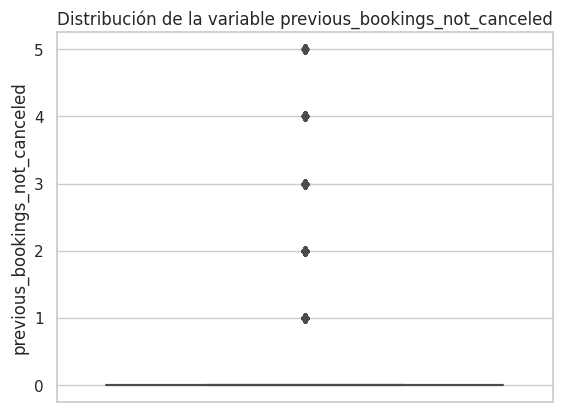

In [172]:
sns.boxplot(df_copia, y = "previous_bookings_not_canceled").set(title = 'Distribución de la variable previous_bookings_not_canceled')

### Caso Booking changes

[Text(0.5, 1.0, 'Distribucion de la variable booking_changes'),
 Text(0.5, 0, 'Booking changes')]

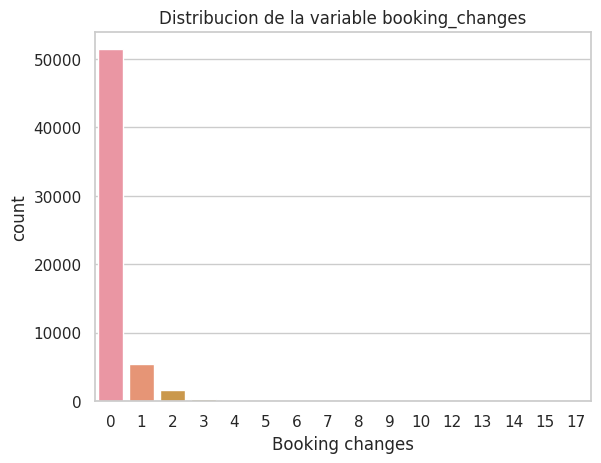

In [173]:
sns.countplot(data = df_copia, x = "booking_changes").set(title = "Distribucion de la variable booking_changes", xlabel = "Booking changes")

[Text(0.5, 1.0, 'Distribucion de la variable booking_changes')]

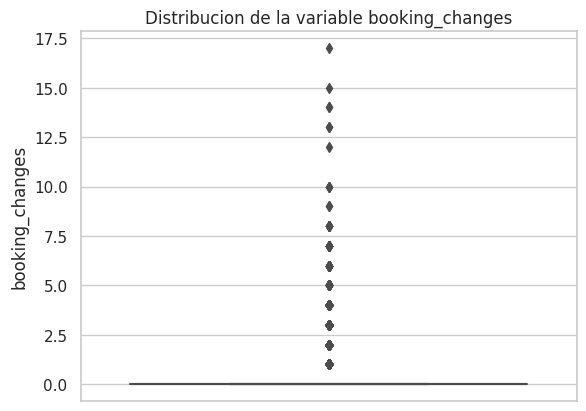

In [174]:
sns.boxplot(data = df_copia, y = "booking_changes").set(title = "Distribucion de la variable booking_changes")

In [175]:
df_copia['booking_changes'].describe()

count    59128.000000
mean         0.189944
std          0.598363
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: booking_changes, dtype: float64

In [176]:
Q1 = np.quantile(df_copia['booking_changes'],0.25)
Q3 = np.quantile(df_copia['booking_changes'],0.75)

IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

print(min)
print(max)

0.0
0.0


Elegimos un número de corte más alto que el máximo del boxplot.

In [177]:
df_copia[df_copia['booking_changes'] > 5]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
1369,City Hotel,159,2016,May,22,26,0,3,1,0.0,...,No Deposit,9.0,0,Transient,119.85,0,1,2016-05-29,f6136dee-67ba-4e94-8f25-d14b916d3a7f,0
2592,City Hotel,353,2016,December,53,29,1,3,2,0.0,...,No Deposit,9.0,0,Transient-Party,73.74,0,0,2017-01-02,0fa32a13-9414-4d4e-9498-c7c770c7d7e5,0
4234,City Hotel,129,2016,August,33,11,2,3,3,0.0,...,No Deposit,9.0,0,Transient,146.70,0,1,2016-08-16,0de5cbd7-b6a0-4d5c-a560-e16dec047fe3,0
6988,City Hotel,6,2015,September,38,14,1,2,1,1.0,...,No Deposit,0.0,0,Contract,109.00,0,2,2015-09-17,c60eefd3-f53a-457c-80bb-574d4287c628,0
7217,Resort Hotel,64,2017,April,16,21,1,2,2,0.0,...,No Deposit,0.0,0,Transient-Party,90.00,0,1,2017-04-24,16ee1205-3bbb-49c9-8915-a503ee07bfcf,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54568,City Hotel,155,2016,July,30,17,2,5,2,0.0,...,No Deposit,9.0,0,Transient,101.88,0,1,2016-04-18,87623231-fe38-4e8e-8274-b59b75875f3f,1
56967,City Hotel,213,2017,August,35,28,1,3,1,0.0,...,No Deposit,19.0,0,Transient-Party,105.75,0,1,2017-09-01,70b6afdf-09f0-4278-a2fb-a15f72b8cddc,0
57991,Resort Hotel,357,2017,August,35,30,0,4,2,0.0,...,No Deposit,240.0,0,Transient,142.22,0,2,2017-05-15,963d9ae5-7a87-4314-be54-12b8fca784d4,1
59526,Resort Hotel,181,2016,October,44,27,2,5,2,0.0,...,No Deposit,240.0,0,Transient-Party,55.25,0,1,2016-07-25,5bd82f39-32fb-4f85-abc4-41fd009719b1,1


Al ser una cantidad despreciable eliminamos las filas.

In [178]:
df_copia = df_copia.drop(df_copia[df_copia['booking_changes'] > 5].index)

In [179]:
df_copia['booking_changes'].describe()

count    59066.000000
mean         0.182084
std          0.541023
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: booking_changes, dtype: float64

[Text(0.5, 1.0, 'Distribucion de la variable booking_changes')]

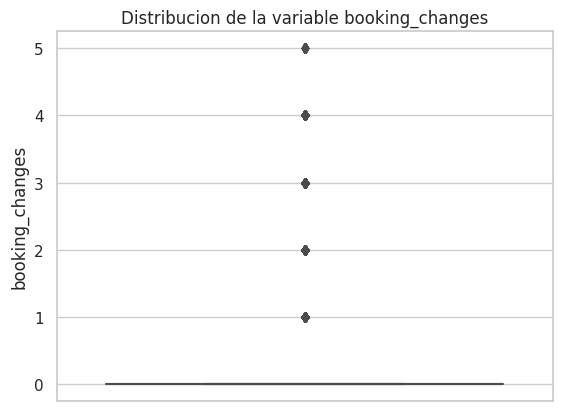

In [180]:
sns.boxplot(data = df_copia, y = "booking_changes").set(title = "Distribucion de la variable booking_changes")

### Caso Parking spaces

[Text(0.5, 1.0, 'Distribucion de la variable parking_spaces'),
 Text(0.5, 0, 'Parking Spaces')]

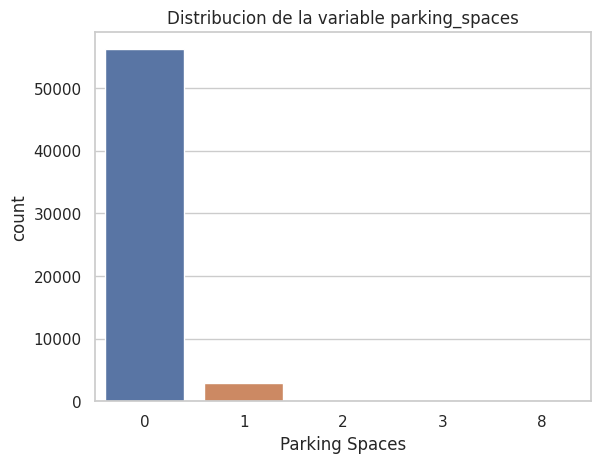

In [181]:
sns.countplot(data = df_copia, x = "parking_spaces").set(title = "Distribucion de la variable parking_spaces", xlabel = "Parking Spaces")

[Text(0.5, 1.0, 'Distribucion de la variable parking_spaces')]

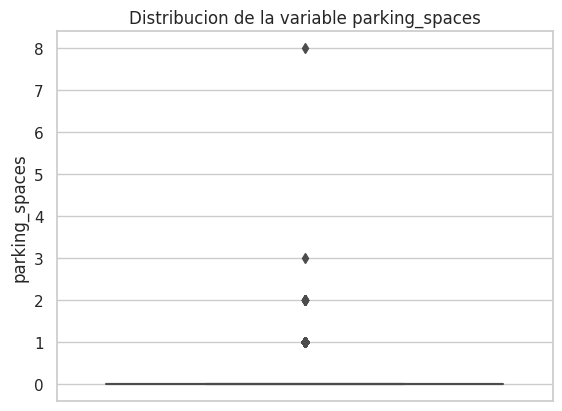

In [182]:
sns.boxplot(data = df_copia, y = "parking_spaces").set(title = "Distribucion de la variable parking_spaces")

In [183]:
df_copia['parking_spaces'].describe()

count    59066.000000
mean         0.049352
std          0.219861
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: parking_spaces, dtype: float64

In [184]:
df_copia[df_copia['parking_spaces'] > 1]

,hotel,lead_time,arrival_year,arrival_month,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,parking_spaces,special_requests,reservation_status_date,id,is_canceled
2168,Resort Hotel,223,2016,May,22,24,1,5,2,0.0,...,No Deposit,0.0,0,Transient-Party,52.00,2,0,2016-05-30,53d1b052-1c99-4fe9-bfc6-690b33ab29ba,0
8269,Resort Hotel,138,2017,March,12,19,2,2,2,0.0,...,No Deposit,0.0,122,Transient-Party,80.00,8,0,2017-03-23,174365a6-2548-48c4-ae12-7842d5498f12,0
9683,Resort Hotel,32,2016,August,36,30,0,1,3,1.0,...,No Deposit,240.0,0,Transient,274.00,2,1,2016-08-31,5025f110-3717-4dec-8f39-8f432aef057a,0
11056,Resort Hotel,0,2017,January,5,29,1,0,2,2.0,...,No Deposit,0.0,0,Transient-Party,85.00,2,0,2017-01-30,1adeaaa0-261b-4cff-96f6-e2c773c07ea1,0
11820,Resort Hotel,36,2016,March,11,10,2,5,2,0.0,...,No Deposit,240.0,0,Transient,59.14,2,2,2016-03-17,0d29b1cc-ce3e-45e1-81a2-0ce1b1012ae1,0
13713,Resort Hotel,205,2017,June,26,26,3,10,2,0.0,...,No Deposit,250.0,0,Transient,111.00,3,0,2017-07-09,4267af65-0a89-4489-b099-e0332c6c51fe,0
14389,Resort Hotel,44,2015,July,28,5,2,0,3,0.0,...,No Deposit,240.0,0,Transient,225.00,2,0,2015-07-07,6c61e85c-012f-482f-b4a2-2080453c8525,0
22088,Resort Hotel,225,2016,May,22,26,2,3,2,0.0,...,Refundable,0.0,0,Transient-Party,80.00,2,0,2016-05-31,413a4fb7-2a0d-47c7-8af4-1723b5b02dfe,0
38632,Resort Hotel,5,2017,February,9,28,1,5,2,0.0,...,No Deposit,0.0,0,Transient-Party,47.50,2,0,2017-03-06,49eadee4-f7ec-4b3d-9a69-e8d174665741,0
42628,Resort Hotel,169,2016,March,14,31,1,3,2,0.0,...,Refundable,0.0,0,Transient-Party,78.00,2,0,2016-04-04,c505c231-5643-4b23-815f-7b282ab173d3,0


Como son extremadamente pocos registros los eliminamos.

In [185]:
df_copia = df_copia.drop(df_copia[df_copia['parking_spaces'] > 1].index)

In [186]:
df_copia['parking_spaces'].describe()

count    59053.000000
mean         0.048804
std          0.215459
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: parking_spaces, dtype: float64

[Text(0.5, 1.0, 'Distribucion de la variable parking_spaces')]

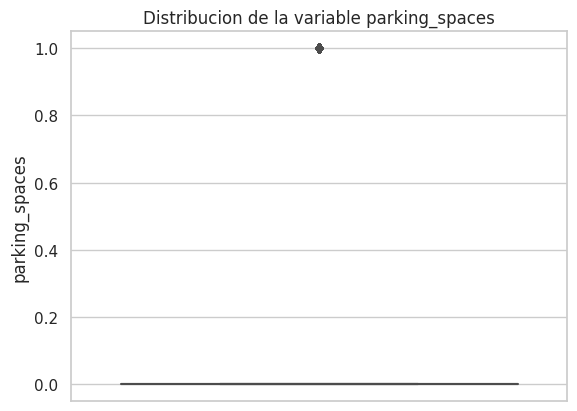

In [187]:
sns.boxplot(data = df_copia, y = "parking_spaces").set(title = "Distribucion de la variable parking_spaces")

###Resultado luego del análisis univariado:

In [188]:
df_copia.describe()

,lead_time,arrival_year,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,parking_spaces,special_requests,is_canceled
count,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.0,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000
mean,105.005504,2016.147630,27.135624,15.806276,0.914484,2.471356,1.865307,0.098589,0.0,0.023741,0.068752,0.039846,0.181854,73.561631,2.310602,102.763938,0.048804,0.522107,0.495199
std,98.230881,0.710249,13.513019,8.774870,0.940808,1.698009,0.470865,0.384891,0.0,0.152244,0.257281,0.329345,0.540478,105.860438,14.992907,46.258584,0.215459,0.769279,0.499981
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,71.670000,0.000000,0.000000,0.000000
50%,75.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,165.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,142.000000,0.000000,126.750000,0.000000,1.000000,1.000000
max,399.000000,2017.000000,53.000000,31.000000,5.000000,10.000000,3.000000,2.000000,0.0,1.000000,3.000000,5.000000,5.000000,535.000000,259.000000,300.000000,1.000000,5.000000,1.000000


## Análisis multivariado

In [189]:
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor

**Ahora vamos a analizar las relaciones entre algunas variables para ver si podemos encontrar valores atípicos.**

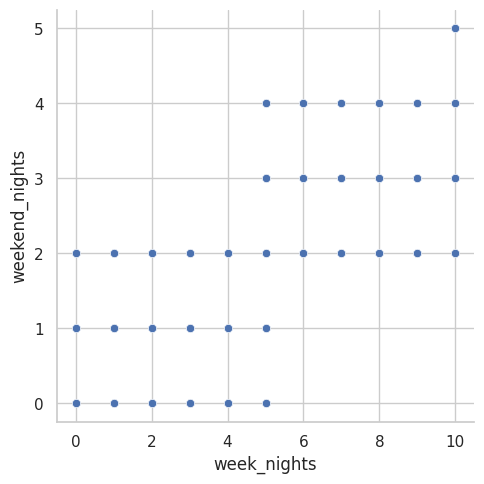

In [190]:
sns.relplot(df_copia, x = "week_nights", y = "weekend_nights")



---



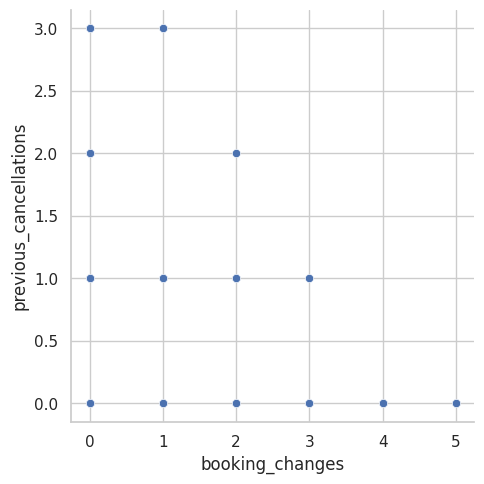

In [191]:
sns.relplot(df_copia, x = "booking_changes", y = "previous_cancellations")



---



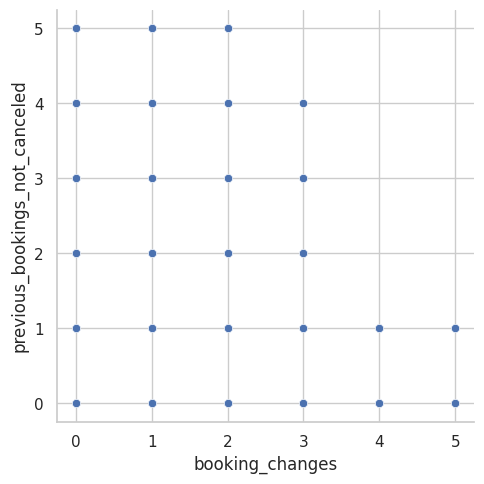

In [192]:
sns.relplot(df_copia, x = "booking_changes", y = "previous_bookings_not_canceled")



---



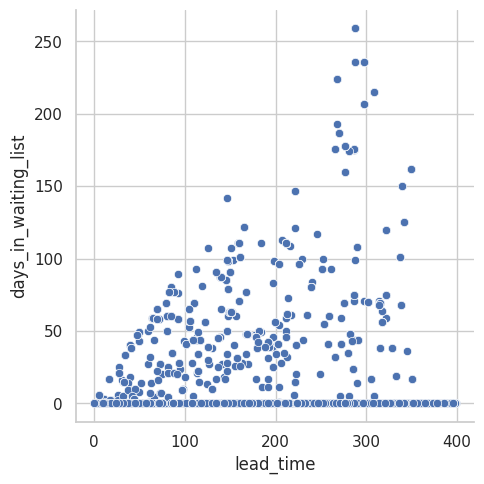

In [193]:
sns.relplot(df_copia, x = "lead_time", y = "days_in_waiting_list")

In [194]:
variables = ['lead_time', 'days_in_waiting_list']

X=df_copia[variables].values


clf = LocalOutlierFactor(n_neighbors=20)


y_pred = clf.fit_predict(X)


df_copia['scores']=clf.negative_outlier_factor_

In [195]:
df_copia[['lead_time', 'days_in_waiting_list', 'scores']]

,lead_time,days_in_waiting_list,scores
0,49,0,-1.0
1,4,0,-1.0
2,25,0,-1.0
3,26,0,-1.0
4,104,0,-1.0
...,...,...,...
61908,24,0,-1.0
61909,0,0,-1.0
61910,10,0,-1.0
61911,143,0,-1.0


In [196]:
df_copia[df_copia['scores'] > -1][['lead_time', 'days_in_waiting_list', 'scores']]

,lead_time,days_in_waiting_list,scores
91,83,22,-0.989324
840,27,21,-0.986662
1472,91,20,-0.988945
2559,83,77,-0.981251
3788,83,77,-0.981251
...,...,...,...
57741,83,77,-0.981251
58484,27,21,-0.986662
58777,297,236,-0.973829
58889,137,25,-0.990369


<ipython-input-197-86049257358a>:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
<ipython-input-197-86049257358a>:10: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


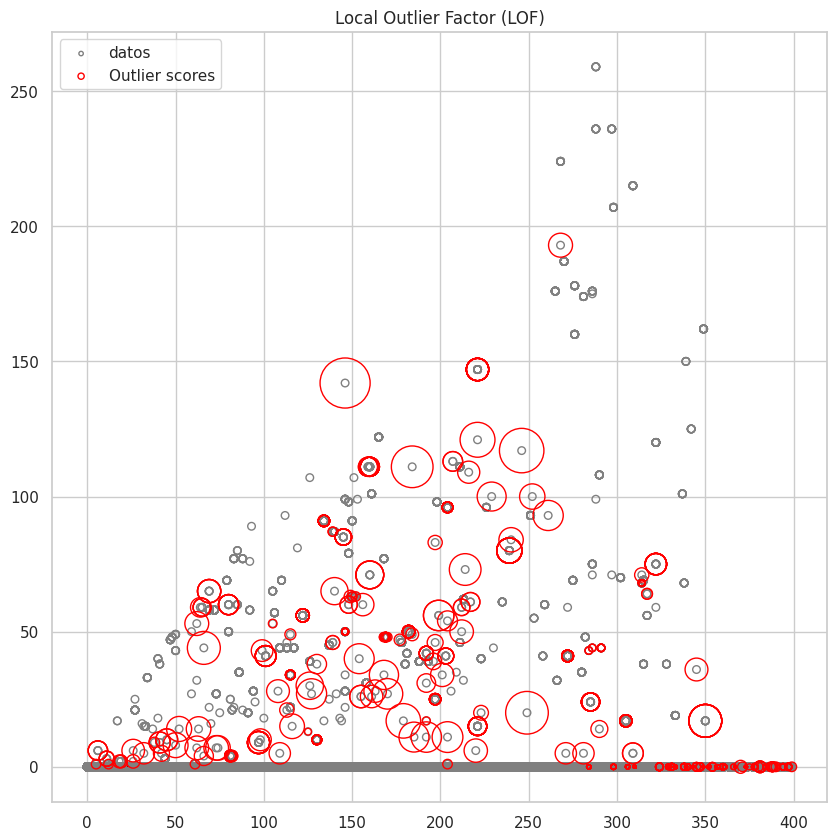

In [197]:
df_copia['radius'] = (df_copia.scores.max() - df_copia.scores) / (df_copia.scores.max() - df_copia.scores.min())

#Grafico LOF
plt.figure(figsize=(10,10))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(df_copia.lead_time.values, df_copia.days_in_waiting_list.values, edgecolor='grey', s=30, label='datos',facecolors='none')
plt.scatter(df_copia.lead_time.values, df_copia.days_in_waiting_list.values, s=1300 * df_copia.radius, edgecolors='red',facecolors='none', label='Outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [198]:
df_copia[df_copia['radius'] >= 0.5][['lead_time','days_in_waiting_list','radius']]

,lead_time,days_in_waiting_list,radius
19224,184,111,0.692555
28696,146,142,1.000000
29990,249,20,0.724999
39555,246,117,0.788456


Ninguno de estos registros los consideramos como outliers, ya que, observando el gráfico, podemos ver que no están muy alejados de todos los registros, simplemente por pura casualidad se encuentran en una posición donde no hay muchos puntos cercanos.

In [199]:
df_copia.drop("scores", axis = 1, inplace = True)
df_copia.drop("radius", axis = 1, inplace = True)



---



In [200]:
edades = ['adults', 'children', 'babies']


X=df_copia[edades].values


clf = LocalOutlierFactor(n_neighbors=20)


y_pred = clf.fit_predict(X)


df_copia['scores']=clf.negative_outlier_factor_

In [201]:
df_copia[['adults', 'children', 'babies', 'scores']]

,adults,children,babies,scores
0,1,0.0,0,-1.0
1,2,0.0,0,-1.0
2,2,2.0,0,-1.0
3,2,0.0,0,-1.0
4,2,0.0,0,-1.0
...,...,...,...,...
61908,2,0.0,0,-1.0
61909,1,0.0,0,-1.0
61910,1,0.0,0,-1.0
61911,2,0.0,0,-1.0


In [202]:
df_copia[df_copia['scores'] > -1][['adults', 'children', 'babies', 'scores']]

,adults,children,babies,scores


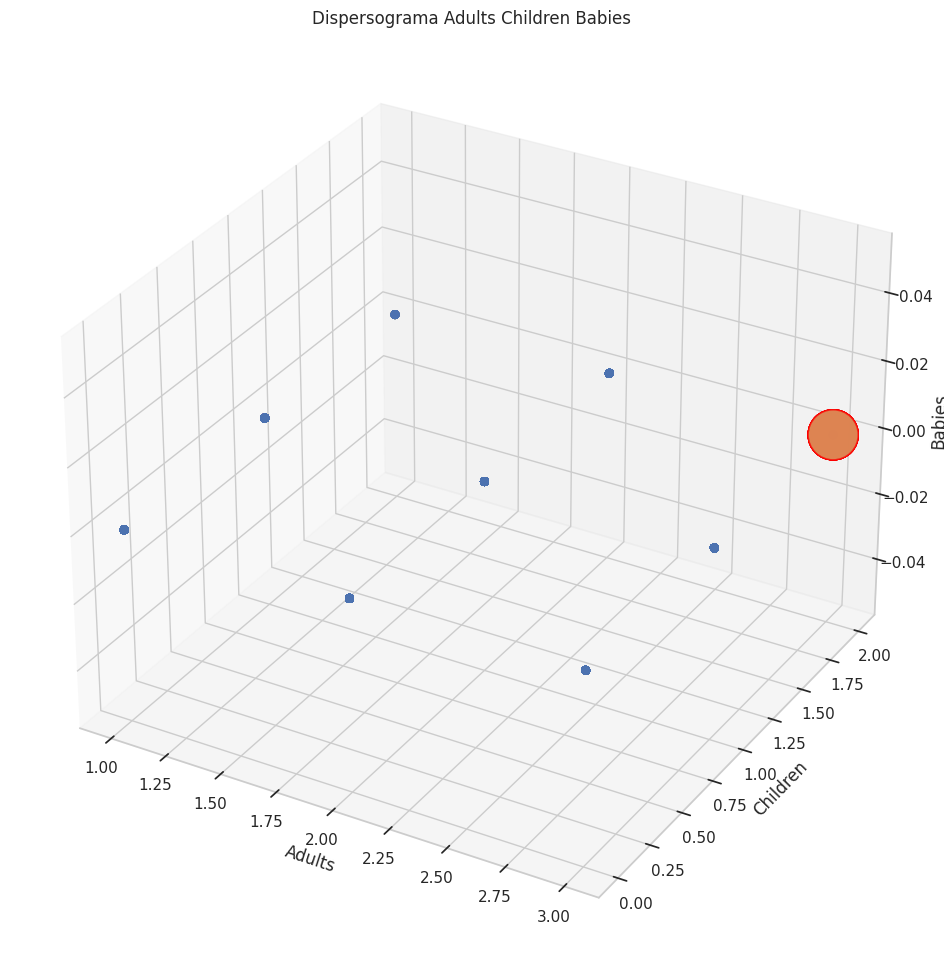

In [203]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
df_copia['radius'] = (df_copia.scores.max() - df_copia.scores) / (df_copia.scores.max() - df_copia.scores.min())

ax.scatter3D(df_copia.adults,df_copia.children,df_copia.babies, s = 30)
ax.scatter3D(df_copia.adults,df_copia.children,df_copia.babies, s = 1300 * df_copia['radius'], edgecolor = "red")
ax.set_xlabel('Adults')
ax.set_ylabel('Children')
ax.set_zlabel('Babies')
plt.title('Dispersograma Adults Children Babies')
plt.show()

In [204]:
df_copia[df_copia['radius'] > 0][['adults', 'children', 'babies', 'radius']]

,adults,children,babies,radius
4794,3,2.0,0,1.0
7070,3,2.0,0,1.0
10955,3,2.0,0,1.0
11592,3,2.0,0,1.0
16888,3,2.0,0,1.0
21022,3,2.0,0,1.0
22518,3,2.0,0,1.0
27027,3,2.0,0,1.0
34735,3,2.0,0,1.0
39131,3,2.0,0,1.0


Ninguno de estos registros se puede considerar outlier, ya que no son valores que se alejen mucho de la distribucion de las variables

In [205]:
df_copia.drop("scores", axis = 1, inplace = True)
df_copia.drop("radius", axis = 1, inplace = True)

#Dataset Final

In [206]:
df_copia.describe()

,lead_time,arrival_year,arrival_week,arrival_day_month,weekend_nights,week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,parking_spaces,special_requests,is_canceled
count,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.0,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000,59053.000000
mean,105.005504,2016.147630,27.135624,15.806276,0.914484,2.471356,1.865307,0.098589,0.0,0.023741,0.068752,0.039846,0.181854,73.561631,2.310602,102.763938,0.048804,0.522107,0.495199
std,98.230881,0.710249,13.513019,8.774870,0.940808,1.698009,0.470865,0.384891,0.0,0.152244,0.257281,0.329345,0.540478,105.860438,14.992907,46.258584,0.215459,0.769279,0.499981
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,71.670000,0.000000,0.000000,0.000000
50%,75.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,165.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,142.000000,0.000000,126.750000,0.000000,1.000000,1.000000
max,399.000000,2017.000000,53.000000,31.000000,5.000000,10.000000,3.000000,2.000000,0.0,1.000000,3.000000,5.000000,5.000000,535.000000,259.000000,300.000000,1.000000,5.000000,1.000000
